# Running ParlaSpeechHR Models

## [0] Start here:

In [2]:
make_model = "both" ## Options "non" for just acoustic model, "lm" for acoustic+LM, and "both" for both"

google_colabbing = False
debug_printing = True

testing_asr = True # if False, cuts audio into chunks
shuffle_transcript = True

In [1]:
work_version_num = 4.0
word_version_preffix = ""
word_version_suffix = ""
work_version = f"{word_version_preffix}v{work_version_num}{word_version_suffix}"

print(work_version)

v4.0


## [INFO ABOUT MACHINE]

In [7]:
### NEED TO REINSTALL PYTORCH WITH CUDA ENABLED AND TRY AGAIN I GUESS

In [8]:
import cpuinfo

info = cpuinfo.get_cpu_info()

print("Processor:", info["brand_raw"])
print("Architecture:", info["arch"])
print("Cores:", info["count"])

Processor: 11th Gen Intel(R) Core(TM) i5-11600 @ 2.80GHz
Architecture: X86_64
Cores: 12


In [9]:
#!pip install pyopencl

import pyopencl as cl

# Get a list of all available platforms
platforms = cl.get_platforms()

for platform in platforms:
    print(f"Platform: {platform.name}")
    print(f"Vendor: {platform.vendor}")
    print(f"Version: {platform.version}")

    # Get a list of all available devices for the current platform
    devices = platform.get_devices()
    for device in devices:
        print(f"\nDevice: {device.name}")
        print(f"Type: {cl.device_type.to_string(device.type)}")
        print(f"Max Compute Units: {device.max_compute_units}")
        print(f"Max Work Item Dimensions: {device.max_work_item_dimensions}")
        print(f"Max Work Group Size: {device.max_work_group_size}")
        print(f"Max Clock Frequency: {device.max_clock_frequency} MHz")
        print(f"Global Memory Size: {device.global_mem_size / (1024 ** 3):.2f} GB")
        print(f"Local Memory Size: {device.local_mem_size / 1024:.2f} KB")
        print(f"Max Memory Allocation Size: {device.max_mem_alloc_size / (1024 ** 3):.2f} GB")
        print(f"OpenCL Version: {device.opencl_c_version}")
        print(f"Driver Version: {device.driver_version}")


Platform: NVIDIA CUDA
Vendor: NVIDIA Corporation
Version: OpenCL 1.2 CUDA 11.1.96

Device: GeForce GTX 760
Type: ALL | GPU
Max Compute Units: 6
Max Work Item Dimensions: 3
Max Work Group Size: 1024
Max Clock Frequency: 1150 MHz
Global Memory Size: 4.00 GB
Local Memory Size: 48.00 KB
Max Memory Allocation Size: 1.00 GB
OpenCL Version: OpenCL C 1.2 
Driver Version: 456.71
Platform: Intel(R) OpenCL HD Graphics
Vendor: Intel(R) Corporation
Version: OpenCL 3.0 

Device: Intel(R) UHD Graphics 750
Type: ALL | GPU
Max Compute Units: 32
Max Work Item Dimensions: 3
Max Work Group Size: 256
Max Clock Frequency: 1300 MHz
Global Memory Size: 6.32 GB
Local Memory Size: 64.00 KB
Max Memory Allocation Size: 3.16 GB
OpenCL Version: OpenCL C 1.2 
Driver Version: 30.0.101.1273
Platform: Intel(R) OpenCL
Vendor: Intel(R) Corporation
Version: OpenCL 3.0 WINDOWS

Device: 11th Gen Intel(R) Core(TM) i5-11600 @ 2.80GHz
Type: ALL | CPU
Max Compute Units: 12
Max Work Item Dimensions: 3
Max Work Group Size: 8192
M

CPU VERSION:
Device: 11th Gen Intel(R) Core(TM) i5-11600 @ 2.80GHz
Type: ALL | CPU
Max Compute Units: 12
Max Work Item Dimensions: 3
Max Work Group Size: 8192
Max Clock Frequency: 2800 MHz
Global Memory Size: 15.80 GB
Local Memory Size: 32.00 KB
Max Memory Allocation Size: 7.90 GB
OpenCL Version: OpenCL C 3.0 
Driver Version: 2023.16.6.0.28_042959

In [3]:
!pip show torch
!pip show torchvision
!pip show torchaudio

Name: torch
Version: 2.3.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: C:\Users\Public\anaconda3\envs\PyPhon\Lib\site-packages
Requires: filelock, fsspec, jinja2, mkl, networkx, sympy, typing-extensions
Required-by: accelerate, optimum, sentence-transformers, torchaudio, torchvision


Name: torchvision
Version: 0.18.1
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: C:\Users\Public\anaconda3\envs\PyPhon\Lib\site-packages
Requires: numpy, pillow, torch
Required-by: sentence-transformers


Name: torchaudio
Version: 2.3.1
Summary: An audio package for PyTorch
Home-page: https://github.com/pytorch/audio
Author: Soumith Chintala, David Pollack, Sean Naren, Peter Goldsborough, Moto Hira, Caroline Chen, Jeff Hwang, Zhaoheng Ni, Xiaohui Zhang
Author-email: soumith@pytorch.org
License: 
Location: C:\Users\Public\anaconda3\envs\PyPhon\Lib\site-packages
Requires: torch
Required-by: 


In [7]:
import subprocess
import shutil

def command_exists(command):
    return shutil.which(command) is not None

def get_pip_version(package_name):
    if not command_exists("pip"):
        return f"pip is not installed on this system."
    result = subprocess.run(["pip", "show", package_name], capture_output=True, text=True)
    for line in result.stdout.splitlines():
        if line.startswith("Version:"):
            return line.split(" ")[-1]
    return f"{package_name} not found via pip."

def get_conda_version(package_name):
    if not command_exists("conda"):
        return f"conda is not installed on this system."
    result = subprocess.run(["conda", "list", package_name], capture_output=True, text=True)
    for line in result.stdout.splitlines():
        if line.startswith(package_name):
            return line.split()[1]
    return f"{package_name} not found via conda."

# Get versions using pip
torch_version = get_pip_version("torch")
torchvision_version = get_pip_version("torchvision")
torchaudio_version = get_pip_version("torchaudio")

print(f"torch version (pip): {torch_version}")
print(f"torchvision version (pip): {torchvision_version}")
print(f"torchaudio version (pip): {torchaudio_version}")

# Get versions using conda
torch_version_conda = get_conda_version("torch")
torchvision_version_conda = get_conda_version("torchvision")
torchaudio_version_conda = get_conda_version("torchaudio")

print(f"torch version (conda): {torch_version_conda}")
print(f"torchvision version (conda): {torchvision_version_conda}")
print(f"torchaudio version (conda): {torchaudio_version_conda}")


torch version (pip): torch not found via pip.
torchvision version (pip): torchvision not found via pip.
torchaudio version (pip): torchaudio not found via pip.
torch version (conda): torch not found via conda.
torchvision version (conda): torchvision not found via conda.
torchaudio version (conda): torchaudio not found via conda.


In [126]:
import torch


if torch.cuda.is_available() and torch.cuda.get_device_capability(0)[0] >= 3.7:
    device = torch.device("cuda:0")  # Use GPU
    print("Using GPU:", torch.cuda.get_device_name(0))
    print("CUDA available:", torch.cuda.is_available())
    print("CUDA version:", torch.version.cuda)
    print("cuDNN version:", torch.backends.cudnn.version())
    print("Device Name:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")  # Use CPU
    print("CUDA not available or GPU is too old.")
    print(f"device set to: CPU ({device})")
    

CUDA not available or GPU is too old.
device set to: CPU (cpu)


## [1] Install all required packages

In [134]:
#!pip install ipython
from IPython.display import clear_output

try:
    import transformers
    print("transformers: All good.")
except ImportError:
    !pip install transformers
    print("transformers: Installed.")

try:
    import pydub
    print("pydub: All good.")
except ImportError:
    !pip install pydub
    print("pydub: Installed.")

try:
    import torch
    print("torch: All good.")
except ImportError:
    !conda install pytorch torchvision torchaudio cpuonly -c pytorch
    # !pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

try:
    import torchaudio
    print("torchaudio: All good.")
except ImportError:
    !pip install torchaudio
    print("torchaudio: Installed.")

try:
    import pyctcdecode
    print("pyctcdecode: All good.")
except ImportError:
    !pip install pyctcdecode
    print("pyctcdecode: Installed.")

try:
    import jiwer
    print("jiwer: All good.")
except ImportError:
    !pip install jiwer
    print("jiwer: Installed.")

try:
    import nltk
    nltk.download('punkt')
    print("nltk: All good.")
except ImportError:
    !pip install nltk
    print("nltk: Installed.")

try:
    from fuzzywuzzy import fuzz
    print("fuzzywuzzy: All good.")
except ImportError:   
    !pip install fuzzywuzzy
    print("fuzzywuzzy: Installed.")

#clear_output(wait=True) # clean the mess
print(f"All good. Every essential package is present to make the code work.")

transformers: All good.
pydub: All good.
torch: All good.
torchaudio: All good.
pyctcdecode: All good.
jiwer: All good.
nltk: All good.
fuzzywuzzy: All good.
All good. Every essential package is present to make the code work.


[nltk_data] Downloading package punkt to C:\Users\Mr Cab
[nltk_data]     Driver\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
try:
    import kenlm
    print(f"All good. kenlm is present to make the LM model.")
except ImportError:
    !pip install https://github.com/kpu/kenlm/archive/master.zip # requires runtime restart
    import os
    os.kill(os.getpid(), 9) # restart automatically

All good. kenlm is present to make the LM model.


## [2] Defining all paths

In [3]:
path_to_pshr_raw_audio_data = r"D:\ParlaSpeech-HR.v1.0\raw"
path_to_pshr_raw_jsonl = r"D:\ParlaSpeech-HR.v1.0\ParlaSpeech-HR.v1.0.jsonl"

path_to_pshr_models = r"D:\ASR\ParlaspeechHR"
path_to_pshr_wav2vec2_l = r"D:\ASR\ParlaspeechHR\wav2vec2-large-slavih-hr"
path_to_pshr_wav2vec2_l_lm = r"D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr-lm"

test_audio_path = r"D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr-lm\nela_film_review.ogg"

In [4]:
# # Mount gdrive and place path (private, no download)
# from google.colab import drive
# drive.mount("/content/drive")

# model_file_path = "/content/drive/MyDrive/pytorch/wav2vec2-large-slavic-hr"
# output_folder = "/content/drive/MyDrive/pytorch/wav2vec2-large-slavic-hr/temp"

# model_file_path_lm = "/content/drive/MyDrive/pytorch/wav2vec2-large-slavic-hr-lm"
# output_folder_lm = "/content/drive/MyDrive/pytorch/wav2vec2-large-slavic-hr-lm/temp"

## [3] Downloading wav2vec2 (plain or WithLM)

In [5]:
import os
import subprocess

if google_colabbing:
    from google.colab import drive
    drive.mount("/content/drive")

    # Check if the directory exists
    if not os.path.exists("/content/wav2vec2-large-slavic-parlaspeech-hr"):
        # Clone the repository if it doesn't exist
        print(f"Downloading to GDRIVE ~2 GB! /wav2vec2-large-slavic-parlaspeech-hr")
        subprocess.run("git clone https://huggingface.co/classla/wav2vec2-large-slavic-parlaspeech-hr", shell=True, check=True)
        os.makedirs("/content/wav2vec2-large-slavic-parlaspeech-hr/temp", exist_ok=True)
    else:
        print("wav2vec2-large-slavic-parlaspeech-hr already exists.")

    model_file_path = "/content/wav2vec2-large-slavic-parlaspeech-hr"
    print(f"\nUsing model from path: {model_file_path}")

else:
    path_to_pshr_wav2vec2_l = r"D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr"
    path_to_pshr_wav2vec2_l_lm = r"D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr-lm"

    # Check if the directories exist and clone if they don't
    if not os.path.exists(path_to_pshr_wav2vec2_l):
        print(f"Downloading LOCALLY ~2 GB! /wav2vec2-large-slavic-parlaspeech-hr")
        subprocess.run(f"git clone https://huggingface.co/classla/wav2vec2-large-slavic-parlaspeech-hr {path_to_pshr_wav2vec2_l}", shell=True, check=True)
        os.makedirs(f"{path_to_pshr_wav2vec2_l}/temp", exist_ok=True)
    else:
        print("wav2vec2-large-slavic-parlaspeech-hr already exists.")

    if not os.path.exists(path_to_pshr_wav2vec2_l_lm):
        print(f"Downloading LOCALLY ~2 GB! /wav2vec2-large-slavic-parlaspeech-hr-LM")
        subprocess.run(f"git clone https://huggingface.co/classla/wav2vec2-large-slavic-parlaspeech-hr-lm {path_to_pshr_wav2vec2_l_lm}", shell=True, check=True)
        os.makedirs(f"{path_to_pshr_wav2vec2_l_lm}/temp", exist_ok=True)
    else:
        print("wav2vec2-large-slavic-parlaspeech-hr-lm already exists.")

    model_file_path = path_to_pshr_wav2vec2_l
    model_lm_file_path = path_to_pshr_wav2vec2_l_lm
    print(f"\nUsing model from path: {model_file_path}")
    print(f"Using LM model from path: {model_lm_file_path}\n")

print("Running locally, BOTH GOOD, good luck")


wav2vec2-large-slavic-parlaspeech-hr already exists.
wav2vec2-large-slavic-parlaspeech-hr-lm already exists.

Using model from path: D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr
Using LM model from path: D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr-lm

Running locally, BOTH GOOD, good luck


## [4] Initilize the model!

In [6]:
from transformers import (
    Wav2Vec2Processor,
    Wav2Vec2ProcessorWithLM,
    Wav2Vec2ForCTC,
    Wav2Vec2FeatureExtractor,
    Wav2Vec2CTCTokenizer,
    Wav2Vec2Config,
    AutoModelForCTC,
    AutoProcessor,
)
import torch
import os
import kenlm
from pyctcdecode import BeamSearchDecoderCTC, build_ctcdecoder

# Set device as GPU, default is CPU
if torch.cuda.is_available() and torch.cuda.get_device_capability(0)[0] >= 3.7:
    device = torch.device("cuda:0")
    print("Using GPU:", torch.cuda.get_device_name(0))
    print("CUDA available:", torch.cuda.is_available())
    print("CUDA version:", torch.version.cuda)
    print("cuDNN version:", torch.backends.cudnn.version())
    print("Device Name:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("CUDA not available or GPU is too old.")
    print(f"device set to: CPU ({device})\n")
    
print(f"device: {device}\n")

config_file_path = os.path.join(model_file_path, "config.json")
config_lm_file_path = os.path.join(model_lm_file_path, "config.json")
#config_json = Wav2Vec2Config.from_json_file(config_file_path)

# Make the non-LM model components
def make_non_lm_components(model_file_path, device):
    # Make the tokenizer
    print(f"Making tokenizer0...")
    tokenizer0 = Wav2Vec2CTCTokenizer(
                                    os.path.join(model_file_path, "vocab.json"),
                                    unk_token="[UNK]",
                                    pad_token="[PAD]",
                                    word_delimiter_token="|"
                                )

    # Make feature extractor
    print(f"Making feature_extractor0...")
    feature_extractor0 = Wav2Vec2FeatureExtractor(
                                    feature_size=1,
                                    sampling_rate=16000,
                                    padding_value=0.0,
                                    do_normalize=True,
                                    return_attention_mask=True
                                )

    # Make the processor
    print(f"Making processor0...")
    processor0 = Wav2Vec2Processor(tokenizer=tokenizer0, feature_extractor=feature_extractor0)

    # Make the model
    print(f"Making model0... device {device}")
    model0 = Wav2Vec2ForCTC.from_pretrained(model_file_path, config=config_file_path).to(device)
    model0.eval()
    
    del tokenizer0
    del feature_extractor0
    
    print(f"Deleted tokenizer0 and feat_extractor0.\nNon-LM components are active.")
    return processor0, model0

#processor0, model0 = make_non_lm_components(model_file_path, device)

# Make the LM model components
def make_lm_components(model_lm_file_path, device):
    
    print(f"Making processor0lm...")
    #processor0lm = AutoProcessor.from_pretrained(model_lm_file_path)
    processor0lm = Wav2Vec2ProcessorWithLM.from_pretrained(model_lm_file_path)

    vocab_lm_path = os.path.join(model_lm_file_path, "vocab.json")
    
    print(f"Making tokenizer0lm...")
    tokenizer0lm = Wav2Vec2CTCTokenizer(
        vocab_lm_path,
        unk_token="[UNK]",
        pad_token="[PAD]",
        word_delimiter_token="|"
    )
    print(f"Making feature_extractor0lm...")
    feature_extractor0lm = Wav2Vec2FeatureExtractor(
        feature_size=1,
        sampling_rate=16000,
        padding_value=0.0,
        do_normalize=True,
        return_attention_mask=True
    )
    print(f"Making model0lm... device {device}")
    model0lm = Wav2Vec2ForCTC.from_pretrained(model_lm_file_path, config=config_lm_file_path).to(device) ##aded config_lm_file_path
    model0lm.eval()

    del tokenizer0lm
    del feature_extractor0lm
    
    print(f"Deleted tokenizer0lm and feat_extractor0lm.\nNon-LM components are active.")

    print(f"\nLM components are active.")
    return processor0lm, model0lm

#processor0lm, model0lm = make_lm_components(model_lm_file_path, device)

if make_model == "non":
    processor0, model0 = make_non_lm_components(model_file_path, device)
    
elif make_model == "lm":
    processor0lm, model0lm = make_lm_components(model_lm_file_path, device)
    
elif make_model == "both":
    processor0, model0 = make_non_lm_components(model_file_path, device)
    processor0lm, model0lm = make_lm_components(model_lm_file_path, device)
    
else:
    print("Invalid value for make_model. Please choose 'non', 'lm', or 'both'.")

C:\Users\Public\anaconda3\envs\PyPhon\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\Public\anaconda3\envs\PyPhon\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\Public\anaconda3\envs\PyPhon\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\Public\anaconda3\envs\PyPhon\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node inst

CUDA not available or GPU is too old.
device set to: CPU (cpu)

device: cpu

Making tokenizer0...
Making feature_extractor0...
Making processor0...
Making model0... device cpu


Some weights of the model checkpoint at D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_v', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
Y

Deleted tokenizer0 and feat_extractor0.
Non-LM components are active.
Making processor0lm...


Only 1 unigrams passed as vocabulary. Is this small or artificial data?


Making tokenizer0lm...
Making feature_extractor0lm...
Making model0lm... device cpu


Some weights of the model checkpoint at D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr-lm were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_v', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr-lm and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.origina

Deleted tokenizer0lm and feat_extractor0lm.
Non-LM components are active.

LM components are active.


## [5] Define cutting down into temp chunks (now with DYNAMICS)

## * def process_transcribe for both

In [114]:
import torchaudio
import numpy as np
from pydub import AudioSegment
import matplotlib.pyplot as plt
from IPython.display import clear_output

TIME_CHUNK = 20
target_sr = 16000

SILENCE_THRESHOLD = 0.01  # Threshold to detect silence
MIN_SILENCE_LENGTH = 0.5  # Minimum length of silence to be considered a split point in seconds

print(f"Is debug_printing on? {debug_printing}\n")

print(f"make_model? {make_model}\n")


if make_model == "non":
### PROCESSING ENGINE ###
#
#### processor0, model0
    def process_transcribe(input_file, processor, model): 
        
            # Begin processing:
            speech, sample_rate = torchaudio.load(input_file)
    
            # Check if resampling is needed
            if sample_rate != target_sr:
                resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=target_sr)
                speech = resampler(speech)
    
            # Process the speech with the processor
            input_values = processor(speech, sampling_rate=target_sr, return_tensors="pt").input_values.to(device)
    
            if debug_printing == True:
              print(input_values.shape)
    
            if input_values.dim() == 3:  # If the shape is [1, 1, audio_length]
                input_values = input_values.squeeze(0)  # Squeeze to [1, audio_length]
    
            if debug_printing == True:
              print(input_values.shape)
    
            # Perform inference
            with torch.no_grad():
                logits = model(input_values).logits
    
            if debug_printing == True:
             print("Logits shape:", logits.shape)
    
            # Get the predicted token IDs (greedy decoding)
            predicted_ids = torch.argmax(logits, dim=-1)
    
            if debug_printing == True:
              print("Predicted IDs shape:", predicted_ids.shape)
    
            # Convert predicted IDs to numpy array
            predicted_ids = predicted_ids.cpu().numpy()
    
            if debug_printing == True:
              print("Predicted IDs (numpy):", predicted_ids)
    
            # Decode the predicted IDs
            transcription = processor.batch_decode(predicted_ids)[0]
    
            transcription = transcription.replace("<pad>", "").strip() ## čak kad je i solo non-lm, opet stavlja <pad>
    
            if debug_printing == True:
              print("Transcription NON:", transcription)
                
    
            return transcription
    
    
    
    def transcribe(input_file, output_folder, target_sr=target_sr, TIME_CHUNK=TIME_CHUNK):
        # Load the audio
        waveform, orig_sr = torchaudio.load(input_file)
    
        # Check if resampling is needed
        if orig_sr != target_sr:
            resampler = torchaudio.transforms.Resample(orig_freq=orig_sr, new_freq=target_sr)
            waveform = resampler(waveform)
    
        # Determine the output file name and format (always WAV)
        base_name = os.path.splitext(os.path.basename(input_file))[0]
    
        # Convert waveform to numpy array for easier processing
        waveform_np = waveform.squeeze().numpy()
    
    
    ################### RUN THE WHOLE AUDIO FILES ##########################
        if testing_asr == True:
                # Directly process the entire audio without chunking
                #output_file = os.path.join(output_folder, f"{base_name}_whole.wav")
                #torchaudio.save(output_file, waveform, sample_rate=target_sr)
                tekst = process_transcribe(input_file, processor0, model0)
                # print(f"Transcription for {base_name}: {tekst}")
                print(tekst)
                #os.remove(output_file)  # Optionally delete the temporary WAV file
        
    ######### ELSE CHUNKS BASED ON TIME_CHUNK INCREMENTS ##################
        else:
            # Function to detect silence points
            def find_silence_points(signal, threshold, min_silence_length, sr):
                silence_points = []
                min_silence_samples = int(min_silence_length * sr)
                is_silence = np.abs(signal) < threshold
                silence_length = 0
                for i in range(len(is_silence)):
                    if is_silence[i]:
                        silence_length += 1
                        if silence_length >= min_silence_samples:
                            silence_points.append(i)
                    else:
                        silence_length = 0
                return silence_points
    
    
            # Find silence points in the audio
            silence_points = find_silence_points(waveform_np, SILENCE_THRESHOLD, MIN_SILENCE_LENGTH, target_sr)
        
            if debug_printing == True:
        
                print(f"Plotting point where silence ({len(silence_points)} points) has been detected in {input_file}")
                # Plot the waveform and silence points
                plt.figure(figsize=(15, 5))
                plt.plot(waveform_np, label='Waveform')
                plt.scatter(silence_points, waveform_np[silence_points], color='red', marker='x', label='Silence Points')
                plt.xlabel('Samples')
                plt.ylabel('Amplitude')
                plt.title('Waveform with Silence Points')
                plt.legend()
                plt.show()
        
            # Split the audio at silence points
            chunk_start = 0
            for i, point in enumerate(silence_points):
                chunk_end = point
                if chunk_end - chunk_start >= TIME_CHUNK * target_sr:
                    chunk = waveform[:, chunk_start:chunk_end]
                    output_file = os.path.join(output_folder, f"{base_name}_temp_chunk{i}.wav")
                    torchaudio.save(output_file, chunk, sample_rate=target_sr)
        
                    # Process the temporary WAV file
                    tekst = process_transcribe(input_file, processor0, model0)
    
                    # Add time marker
                    time = format_time(chunk_start / target_sr)
                    print(f"[{time}] {tekst}")
        
                    # Delete the temporary WAV file after processing
                    os.remove(output_file)
        
                    chunk_start = chunk_end
                    
            def format_time(seconds):
                minutes = int(seconds // 60)
                seconds = int(seconds % 60)
                return f"{minutes:02d}:{seconds:02d}"
        
            # Process the remaining audio if any
            if chunk_start < waveform.size(1):
                chunk = waveform[:, chunk_start:]
                output_file = os.path.join(output_folder, f"{base_name}_temp_chunk{len(silence_points)}.wav")
                torchaudio.save(output_file, chunk, sample_rate=target_sr)
                tekst = process_transcribe(input_file, processor0, model0)
                time = format_time(chunk_start / target_sr)
                print(f"[{time}] {tekst}")
                os.remove(output_file)



if make_model == "lm":

    #### L M #########
    #
    #### processor0lm, model0lm
    def process_transcribe_lm(input_file, processor, model):
    
        if debug_printing:
            print(f"input_file type {type(input_file)}")
            print(f"input_file {input_file}")
        # Load audio and perform ASR using wav2vec2 with LM
        speech, sample_rate = torchaudio.load(input_file)
        
        # Check if resampling is needed
        target_sr = 16000  # Example target sampling rate
        if sample_rate != target_sr:
            resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=target_sr)
            speech = resampler(speech)
        
        # Process the speech with the processor
        input_values = processor(speech, sampling_rate=target_sr, return_tensors="pt").input_values.to(device)
    
        if debug_printing:
            print("Input values shape:", input_values.shape)
    
        # Ensure input_values has correct shape for model0lm
        input_values = input_values.squeeze(0)  # Assuming batch_size=1
    
        if debug_printing:
            print("Adjusted input values shape:", input_values.shape)
    
        # Perform inference
        with torch.no_grad():  # Inference mode
            logits = model(input_values).logits
    
        if debug_printing:
            print("Logits shape after processing:", logits.shape)
            #print("Logits max value:", np.amax(logits, axis=1))
    
        # if debug_printing:
        #     print("Logits shape:", logits.shape)
    
        # Decode the predicted IDs
        transcriptions = processor.batch_decode(logits.numpy()).text

        if debug_printing == False:
            clear_output()

    
        # Ensure transcription is returned as a string
        transcription = transcriptions[0] if transcriptions else ""  # Assuming batch_size=1

        if debug_printing == True:
            print("Transcription LM:", transcription)
    
        return transcription
    
    
    
    def transcribe_lm(input_file, output_folder, target_sr=target_sr, TIME_CHUNK=TIME_CHUNK):
        # Load the audio
        waveform, orig_sr = torchaudio.load(input_file)
    
        # Check if resampling is needed
        if orig_sr != target_sr:
            resampler = torchaudio.transforms.Resample(orig_freq=orig_sr, new_freq=target_sr)
            waveform = resampler(waveform)
    
        # Determine the output file name and format (always WAV)
        base_name = os.path.splitext(os.path.basename(input_file))[0]
    
        # Convert waveform to numpy array for easier processing
        waveform_np = waveform.squeeze().numpy()
    
       
        if testing_asr:
    ################### RUN THE WHOLE AUDIO FILES ##########################
            tekst = process_transcribe_lm(input_file, processor0lm, model0lm)
           
            if debug_printing == True:
                print(f"LM p_t_l Transcription for {base_name}: {tekst}")
        
            #return tekst
    
        else:
            # Function to detect silence points
            def find_silence_points(signal, threshold, min_silence_length, sr):
                silence_points = []
                min_silence_samples = int(min_silence_length * sr)
                is_silence = np.abs(signal) < threshold
                silence_length = 0
                for i in range(len(is_silence)):
                    if is_silence[i]:
                        silence_length += 1
                        if silence_length >= min_silence_samples:
                            silence_points.append(i)
                    else:
                        silence_length = 0
                return silence_points
    
    
            # Find silence points in the audio
            silence_points = find_silence_points(waveform_np, SILENCE_THRESHOLD, MIN_SILENCE_LENGTH, target_sr)
        
            if debug_printing == True:
        
                print(f"Plotting point where silence ({len(silence_points)} points) has been detected in {input_file}")
                # Plot the waveform and silence points
                plt.figure(figsize=(15, 5))
                plt.plot(waveform_np, label='Waveform')
                plt.scatter(silence_points, waveform_np[silence_points], color='red', marker='x', label='Silence Points')
                plt.xlabel('Samples')
                plt.ylabel('Amplitude')
                plt.title('Waveform with Silence Points')
                plt.legend()
                plt.show()
        
            # Split the audio at silence points
            chunk_start = 0
            for i, point in enumerate(silence_points):
                chunk_end = point
                if chunk_end - chunk_start >= TIME_CHUNK * target_sr:
                    chunk = waveform[:, chunk_start:chunk_end]
                    output_file = os.path.join(output_folder, f"{base_name}_temp_chunk{i}.wav")
                    torchaudio.save(output_file, chunk, sample_rate=target_sr)
        
                    # Process the temporary WAV file
    ####################################################################
                    tekst = process_transcribe_lm(input_file, processor0lm, model0lm)
                    time = format_time(chunk_start / target_sr)
                    print(f"[{time}] {tekst}")
        
                    # Optionally, you can delete the temporary WAV file after processing
                    os.remove(output_file)
        
                    chunk_start = chunk_end
                    
            def format_time(seconds):
                minutes = int(seconds // 60)
                seconds = int(seconds % 60)
                return f"{minutes:02d}:{seconds:02d}"
        
            # Process the remaining audio if any
            if chunk_start < waveform.size(1):
                chunk = waveform[:, chunk_start:]
                output_file = os.path.join(output_folder, f"{base_name}_temp_chunk{len(silence_points)}.wav")
                torchaudio.save(output_file, chunk, sample_rate=target_sr)
    ####################################################################
                tekst = process_transcribe_lm(input_file, processor, model)
                
                time = format_time(chunk_start / target_sr)
                print(f"[{time}] {tekst}")
                os.remove(output_file)


print(f"Transcription function defined and active: \nSplitting audio in: {TIME_CHUNK}s segments (dynamically). \n")


Is debug_printing on? False

make_model? both

Transcription function defined and active: 
Splitting audio in: 20s segments (dynamically). 



In [115]:
### THE SAME BUT FOR BOTH

from IPython.display import clear_output
import torchaudio
import numpy as np
from pydub import AudioSegment
import matplotlib.pyplot as plt

TIME_CHUNK = 20
target_sr = 16000

SILENCE_THRESHOLD = 0.01  # Threshold to detect silence
MIN_SILENCE_LENGTH = 0.5  # Minimum length of silence to be considered a split point in seconds

print(f"Is debug_printing on? {debug_printing}\n")


if make_model == "both":
### PROCESSING ENGINE ###
    print(f"doing: {make_model}, meaning you need this one\n")
#### processor0, model0
    def process_transcribe(input_file, processor, model): 
        
            # Begin processing:
            speech, sample_rate = torchaudio.load(input_file)
    
            # Check if resampling is needed
            if sample_rate != target_sr:
                resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=target_sr)
                speech = resampler(speech)
    
            # Process the speech with the processor
            input_values = processor(speech, sampling_rate=target_sr, return_tensors="pt").input_values.to(device)
    
            if debug_printing == True:
              print(input_values.shape)
    
            if input_values.dim() == 3:  # If the shape is [1, 1, audio_length]
                input_values = input_values.squeeze(0)  # Squeeze to [1, audio_length]
    
            if debug_printing == True:
              print(input_values.shape)
    
            # Perform inference
            with torch.no_grad():
                logits = model(input_values).logits
    
            if debug_printing == True:
             print("Logits shape:", logits.shape)
    
            # Get the predicted token IDs (greedy decoding)
            predicted_ids = torch.argmax(logits, dim=-1)
    
            if debug_printing == True:
              print("Predicted IDs shape:", predicted_ids.shape)
    
            # Convert predicted IDs to numpy array
            predicted_ids = predicted_ids.cpu().numpy()
    
            if debug_printing == True:
              print("Predicted IDs (numpy):", predicted_ids)
    
            # Decode the predicted IDs
            transcription = processor.batch_decode(predicted_ids)[0]
    
            transcription = transcription.replace("<pad>", "").strip() ## čak kad je i solo non-lm, opet stavlja <pad>
    
            if debug_printing == True:
              print("Transcription NON:", transcription)
                
    
            return transcription
    
    
    
    def transcribe(input_file, output_folder, target_sr=target_sr, TIME_CHUNK=TIME_CHUNK):
        # Load the audio
        waveform, orig_sr = torchaudio.load(input_file)
    
        # Check if resampling is needed
        if orig_sr != target_sr:
            resampler = torchaudio.transforms.Resample(orig_freq=orig_sr, new_freq=target_sr)
            waveform = resampler(waveform)
    
        # Determine the output file name and format (always WAV)
        base_name = os.path.splitext(os.path.basename(input_file))[0]
    
        # Convert waveform to numpy array for easier processing
        waveform_np = waveform.squeeze().numpy()
    
    
    ################### RUN THE WHOLE AUDIO FILES ##########################
        if testing_asr == True:
                # Directly process the entire audio without chunking
                #output_file = os.path.join(output_folder, f"{base_name}_whole.wav")
                #torchaudio.save(output_file, waveform, sample_rate=target_sr)
                tekst = process_transcribe(input_file, processor0, model0)
                # print(f"Transcription for {base_name}: {tekst}")
                print(tekst)
                #os.remove(output_file)  # Optionally delete the temporary WAV file
        
    ######### ELSE CHUNKS BASED ON TIME_CHUNK INCREMENTS ##################
        else:
            # Function to detect silence points
            def find_silence_points(signal, threshold, min_silence_length, sr):
                silence_points = []
                min_silence_samples = int(min_silence_length * sr)
                is_silence = np.abs(signal) < threshold
                silence_length = 0
                for i in range(len(is_silence)):
                    if is_silence[i]:
                        silence_length += 1
                        if silence_length >= min_silence_samples:
                            silence_points.append(i)
                    else:
                        silence_length = 0
                return silence_points
    
    
            # Find silence points in the audio
            silence_points = find_silence_points(waveform_np, SILENCE_THRESHOLD, MIN_SILENCE_LENGTH, target_sr)
        
            if debug_printing == True:
        
                print(f"Plotting point where silence ({len(silence_points)} points) has been detected in {input_file}")
                # Plot the waveform and silence points
                plt.figure(figsize=(15, 5))
                plt.plot(waveform_np, label='Waveform')
                plt.scatter(silence_points, waveform_np[silence_points], color='red', marker='x', label='Silence Points')
                plt.xlabel('Samples')
                plt.ylabel('Amplitude')
                plt.title('Waveform with Silence Points')
                plt.legend()
                plt.show()
        
            # Split the audio at silence points
            chunk_start = 0
            for i, point in enumerate(silence_points):
                chunk_end = point
                if chunk_end - chunk_start >= TIME_CHUNK * target_sr:
                    chunk = waveform[:, chunk_start:chunk_end]
                    output_file = os.path.join(output_folder, f"{base_name}_temp_chunk{i}.wav")
                    torchaudio.save(output_file, chunk, sample_rate=target_sr)
        
                    # Process the temporary WAV file
                    tekst = process_transcribe(input_file, processor0, model0)
    
                    # Add time marker
                    time = format_time(chunk_start / target_sr)
                    print(f"[{time}] {tekst}")
        
                    # Delete the temporary WAV file after processing
                    os.remove(output_file)
        
                    chunk_start = chunk_end
                    
            def format_time(seconds):
                minutes = int(seconds // 60)
                seconds = int(seconds % 60)
                return f"{minutes:02d}:{seconds:02d}"
        
            # Process the remaining audio if any
            if chunk_start < waveform.size(1):
                chunk = waveform[:, chunk_start:]
                output_file = os.path.join(output_folder, f"{base_name}_temp_chunk{len(silence_points)}.wav")
                torchaudio.save(output_file, chunk, sample_rate=target_sr)
                tekst = process_transcribe(input_file, processor0, model0)
                time = format_time(chunk_start / target_sr)
                print(f"[{time}] {tekst}")
                os.remove(output_file)





    #### L M #########
    #
    #### processor0lm, model0lm
    def process_transcribe_lm(input_file, processor, model):
    
        if debug_printing:
            print(f"input_file type {type(input_file)}")
            print(f"input_file {input_file}")
        # Load audio and perform ASR using wav2vec2 with LM
        speech, sample_rate = torchaudio.load(input_file)
        
        # Check if resampling is needed
        target_sr = 16000  # Example target sampling rate
        if sample_rate != target_sr:
            resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=target_sr)
            speech = resampler(speech)
        
        # Process the speech with the processor
        input_values = processor(speech, sampling_rate=target_sr, return_tensors="pt").input_values.to(device)
    
        if debug_printing:
            print("Input values shape:", input_values.shape)
    
        # Ensure input_values has correct shape for model0lm
        input_values = input_values.squeeze(0)  # Assuming batch_size=1
    
        if debug_printing:
            print("Adjusted input values shape:", input_values.shape)
    
        # Perform inference
        with torch.no_grad():  # Inference mode
            logits = model(input_values).logits
    
        if debug_printing:
            print("Logits shape after processing:", logits.shape)
            #print("Logits max value:", np.amax(logits, axis=1))
    
        # if debug_printing:
        #     print("Logits shape:", logits.shape)
    
        # Decode the predicted IDs
        transcriptions = processor.batch_decode(logits.numpy()).text

        if debug_printing == False:
            clear_output()
        
        # Ensure transcription is returned as a string
        transcription = transcriptions[0] if transcriptions else ""  # Assuming batch_size=1

        if debug_printing:
            print("Transcription LM:", transcription)
    
        return transcription
    
    
    
    def transcribe_lm(input_file, output_folder, target_sr=target_sr, TIME_CHUNK=TIME_CHUNK):
        # Load the audio
        waveform, orig_sr = torchaudio.load(input_file)
    
        # Check if resampling is needed
        if orig_sr != target_sr:
            resampler = torchaudio.transforms.Resample(orig_freq=orig_sr, new_freq=target_sr)
            waveform = resampler(waveform)
    
        # Determine the output file name and format (always WAV)
        base_name = os.path.splitext(os.path.basename(input_file))[0]
    
        # Convert waveform to numpy array for easier processing
        waveform_np = waveform.squeeze().numpy()
    
       
        if testing_asr:
    ################### RUN THE WHOLE AUDIO FILES ##########################
            tekst = process_transcribe_lm(input_file, processor0lm, model0lm)
           
            if debug_printing == True:
                print(f"LM p_t_l Transcription for {base_name}: {tekst}")
        
            #return tekst
    
        else:
            # Function to detect silence points
            def find_silence_points(signal, threshold, min_silence_length, sr):
                silence_points = []
                min_silence_samples = int(min_silence_length * sr)
                is_silence = np.abs(signal) < threshold
                silence_length = 0
                for i in range(len(is_silence)):
                    if is_silence[i]:
                        silence_length += 1
                        if silence_length >= min_silence_samples:
                            silence_points.append(i)
                    else:
                        silence_length = 0
                return silence_points
    
    
            # Find silence points in the audio
            silence_points = find_silence_points(waveform_np, SILENCE_THRESHOLD, MIN_SILENCE_LENGTH, target_sr)
        
            if debug_printing == True:
        
                print(f"Plotting point where silence ({len(silence_points)} points) has been detected in {input_file}")
                # Plot the waveform and silence points
                plt.figure(figsize=(15, 5))
                plt.plot(waveform_np, label='Waveform')
                plt.scatter(silence_points, waveform_np[silence_points], color='red', marker='x', label='Silence Points')
                plt.xlabel('Samples')
                plt.ylabel('Amplitude')
                plt.title('Waveform with Silence Points')
                plt.legend()
                plt.show()
        
            # Split the audio at silence points
            chunk_start = 0
            for i, point in enumerate(silence_points):
                chunk_end = point
                if chunk_end - chunk_start >= TIME_CHUNK * target_sr:
                    chunk = waveform[:, chunk_start:chunk_end]
                    output_file = os.path.join(output_folder, f"{base_name}_temp_chunk{i}.wav")
                    torchaudio.save(output_file, chunk, sample_rate=target_sr)
        
                    # Process the temporary WAV file
    ####################################################################
                    tekst = process_transcribe_lm(input_file, processor0lm, model0lm)
                    time = format_time(chunk_start / target_sr)
                    print(f"[{time}] {tekst}")
        
                    # Optionally, you can delete the temporary WAV file after processing
                    os.remove(output_file)
        
                    chunk_start = chunk_end
                    
            def format_time(seconds):
                minutes = int(seconds // 60)
                seconds = int(seconds % 60)
                return f"{minutes:02d}:{seconds:02d}"
        
            # Process the remaining audio if any
            if chunk_start < waveform.size(1):
                chunk = waveform[:, chunk_start:]
                output_file = os.path.join(output_folder, f"{base_name}_temp_chunk{len(silence_points)}.wav")
                torchaudio.save(output_file, chunk, sample_rate=target_sr)
    ####################################################################
                tekst = process_transcribe_lm(input_file, processor, model)
                
                time = format_time(chunk_start / target_sr)
                print(f"[{time}] {tekst}")
                os.remove(output_file)


print(f"Transcription function defined and active: \nSplitting audio in: {TIME_CHUNK}s segments (dynamically). \n")


Is debug_printing on? False

doing: both, meaning you need this one

Transcription function defined and active: 
Splitting audio in: 20s segments (dynamically). 



## [6] Quick test to verify

In [99]:
debug_printing = False

In [23]:
path_to_pshr_wav2vec2_l = r"D:\ASR\ParlaspeechHR\wav2vec2-large-slavih-hr\wav2vec2-large-slavic-parlaspeech-hr"
path_to_pshr_wav2vec2_l_lm = r"D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr-lm"

#test_audio_path_pc = r"D:\ASR\ParlaspeechHR\wav2vec2-large-slavic-hr-lm\nela_film_review.ogg" # WORKS WELL
test_audio_path_pc = r"D:\ASR\ParlaspeechHR\ivan_snimka.opus"

In [24]:
if testing_asr == True:
    print(f"No chunking. Per file basis. (testing_asr = {testing_asr})\n")
else:
    print(f"Chunking audio! Using silence points. (testing_asr = {testing_asr})\n")


if google_colabbing == True:

    test_audio_path = "/content/drive/MyDrive/pytorch/wav2vec2-large-slavic-hr-lm/ivan_snimka.opus"
    test_audio_temp = "/content/wav2vec2-large-slavic-parlaspeech-hr/temp"
    
else:

    if make_model == "non":
        # ACOUSTIC MODEL
        test_audio_path = test_audio_path_pc
        test_audio_temp = path_to_pshr_wav2vec2_l + r"\temp"
        transcribe(test_audio_path, test_audio_temp, target_sr=target_sr, TIME_CHUNK=TIME_CHUNK)

    if make_model == "lm":
        # LM MODEL
        test_audio_path = test_audio_path_pc
        test_audio_temp_lm = path_to_pshr_wav2vec2_l_lm + r"\temp"
        transcribe_lm(test_audio_path, test_audio_temp_lm, target_sr=target_sr, TIME_CHUNK=TIME_CHUNK)

    if make_model == "both":
        # ACOUSTIC MODEL
        test_audio_path = test_audio_path_pc
        test_audio_temp = path_to_pshr_wav2vec2_l + r"\temp"
        transcribe(test_audio_path, test_audio_temp, target_sr=target_sr, TIME_CHUNK=TIME_CHUNK)
        print(f"\n\n")
        # LM MODEL
        test_audio_temp_lm = path_to_pshr_wav2vec2_l_lm + r"\temp"
        transcribe_lm(test_audio_path, test_audio_temp_lm, target_sr=target_sr, TIME_CHUNK=TIME_CHUNK)


No chunking. Per file basis. (testing_asr = True)

sada ti šaljem glasovnu poruku i ne znam šta pričam ali evo pričam znači ovo tu mi je trebalo jedno 30 sati da dođem do ovog trenutka pričem normlno razgovjetno i nadam se da će transkripcija biti dobra naime ja to nisam izmislio nego su to zapravo r slovensa uzeli od facboka model i strenirali ga na govoru iz parlamenta specifično za hrvatski jeziki





Parallel batch decoding is not currently supported in this platform. Falling back to sequential decoding.


Transcription: sada ti šaljem glasovnu poruku i ne znam šta pričamali evopričam znači ovo tu mi je trebalo jedno 30sati da dođem do ovog trenutka pričemnoralo razgovjetno i nadam se daće transkripcija biti dobra naime ja to nisam izmislio nego su tozapravo 3 slovensa uzeli od facboka model istreniraliga na govoru iz parlamenta specifično za hrvatski jeziku


In [25]:
# Check the vocabulary size of the processor

if make_model == "non":
        # ACOUSTIC MODEL
        vocab_size = len(processor0.tokenizer.get_vocab())
        print(f"Vocabulary size NON: {vocab_size}")

if make_model == "lm":
        # LM MODEL
        vocab_size_lm = len(processor0lm.tokenizer.get_vocab())
        print(f"Vocabulary size LM: {vocab_size_lm}")

if make_model == "both":
        vocab_size = len(processor0.tokenizer.get_vocab())
        vocab_size_lm = len(processor0lm.tokenizer.get_vocab())
        
        print(f"Vocabulary size NON: {vocab_size}, LM: {vocab_size_lm}")

Vocabulary size NON: 51, LM: 51


# MODEL IS NOW OPERATIONAL

## [7] Prepare to run ling analysis

In [26]:
%%time

import os

# Directory containing audio files
path_to_pshr_raw_audio_data = r"D:\ParlaSpeech-HR.v1.0\raw"

# List all files in the directory
audio_files = os.listdir(path_to_pshr_raw_audio_data)

# Count the number of audio files
num_audio_files = len(audio_files)

print(f"Number of audio files in '{path_to_pshr_raw_audio_data}': {num_audio_files}\n")

# JSONL file containing metadata
path_to_pshr_raw_jsonl = r"D:\ParlaSpeech-HR.v1.0\ParlaSpeech-HR.v1.0.jsonl"

# Counting lines in the JSONL file
num_entries = 0
with open(path_to_pshr_raw_jsonl, 'r', encoding='utf-8') as f:
    for line in f:
        num_entries += 1

print(f"Number of entries in '{path_to_pshr_raw_jsonl}': {num_entries}\n")


Number of audio files in 'D:\ParlaSpeech-HR.v1.0\raw': 403925

Number of entries in 'D:\ParlaSpeech-HR.v1.0\ParlaSpeech-HR.v1.0.jsonl': 403925

CPU times: total: 703 ms
Wall time: 2 s


In [27]:
import os
import json

# Paths to your data
path_to_pshr_raw_audio_data = r"D:\ParlaSpeech-HR.v1.0\raw"
path_to_pshr_raw_jsonl = r"D:\ParlaSpeech-HR.v1.0\ParlaSpeech-HR.v1.0.jsonl"

# Limit number of transcriptions to print
limit = 2
count = 0

# Read JSONL file
audio_transcriptions = {}
with open(path_to_pshr_raw_jsonl, 'r', encoding='utf-8') as jsonl_file:
    for line in jsonl_file:
        if count >= limit:
            break
        
        data = json.loads(line.strip())
        audio_filename = os.path.basename(data['path'])
        audio_transcriptions[audio_filename] = data['norm_words']  # Use 'norm_words' or other transcription field
        
        count += 1
        
audio_transcriptions = dict(sorted(audio_transcriptions.items()))

print(f"audio_transcriptions: {audio_transcriptions}")


audio_transcriptions: {'seg.-k1z8behXXg_14758.42-14778.39.flac': ['km', 'i', 'distribuira', 'ih', 'na', 'nekih', 'dvije', 'tisuće', 'šesto', 'priključaka', 'zahvaća', 'još', 'rubne', 'dijelove', 'nekih', 'drugih', 'lokalnih', 'jedinica', 'mogu', 'reć', 'da', 'ima', 'samo', 'osam', 'zaposlenih', 'ukupno', 'prihode', 'u', 'iznosu', 'od', 'četiriosam', 'milijuna', 'kuna', 'vrijednost', 'imovine', 'društva', 'četrdeset', 'pet', 'milijuna', 'kuna', 'evo', 'dvije', 'tisuće', 'četrnaest', 'do', 'dvije', 'tisuće', 'osamnaest', 'je', 'realizirano', 'je', 'ukupno'], 'seg.qNpeHxO0WzA_1967.6-1986.11.flac': ['primjeni', 'željezničkih', 'paketa', 'kojima', 'se', 'postupno', 'i', 'nezaustavljivo', 'stvara', 'jedinstveni', 'europski', 'željeznički', 'prostor', 'provedba', 'ovog', 'zakona', 'nema', 'financijski', 'utjecaj', 'na', 'državni', 'proračun', 'hvala', 'lijepo', 'zahvaljujem', 'ministru', 'imamo', 'sedam', 'replika', 'prvi', 'je', 'kolega', 'kirin', 'izvolite']}


### Generiranje audio_transcriptions dict(sorted)

In [28]:
%%time

print(f"FULL AUDIO_TRANSCRIPTIONS HERE")

import os
import json

# Paths to your data
path_to_pshr_raw_audio_data = r"D:\ParlaSpeech-HR.v1.0\raw"
path_to_pshr_raw_jsonl = r"D:\ParlaSpeech-HR.v1.0\ParlaSpeech-HR.v1.0.jsonl"

# Read JSONL file
audio_transcriptions = {}
with open(path_to_pshr_raw_jsonl, 'r', encoding='utf-8') as jsonl_file:
    for line in jsonl_file:
        data = json.loads(line.strip())
        audio_filename = os.path.basename(data['path'])
        audio_transcriptions[audio_filename] = data['norm_words']  # Use 'norm_words' or other transcription field

audio_transcriptions = dict(sorted(audio_transcriptions.items()))



FULL AUDIO_TRANSCRIPTIONS HERE
CPU times: total: 11.9 s
Wall time: 11.9 s


In [29]:
%%time

# Print limited number of audio_transcriptions
limit = 3
count = 0

print(f"Displaying first {limit} audio names w/ transcription:\n")

# List all files in the directory
all_files = os.listdir(path_to_pshr_raw_audio_data)

# Sort the files alphabetically or by any other criteria, if needed
all_files.sort()

# Select the first 10 files
first_10_files = all_files[:10]

print(f"debug_printing: {debug_printing}")

if debug_printing == True:
    # Debug prints
    print("First 10 Files:")
    print(first_10_files)
    print("\nAudio Transcriptions:")

for filename, transcription in audio_transcriptions.items():
    if count >= limit:
        break
    if debug_printing == True:
        print(f"{filename}: {transcription}")
    count += 1

# Step 3: Correlate audio files with transcriptions (limiting to 'limit' iterations)
print("\nCorrelating audio files with transcriptions:\n")
for i, audio_file in enumerate(first_10_files[:limit]):
    if audio_file in audio_transcriptions:
        transcription = ' '.join(audio_transcriptions[audio_file])
        print(f"Audio File:\n{audio_file}\n\nTranscription:\n{transcription}")
    else:
        print(f"No transcription found for {audio_file}")
    
    # Add a separator between iterations for clarity, except after the last item
    if i < (limit):
        print("-" * 30)
        print("\n")


Displaying first 3 audio names w/ transcription:

debug_printing: False

Correlating audio files with transcriptions:

Audio File:
seg.-EO06cT21uY_10038.21-10054.64.flac

Transcription:
lijepo kolegice i kolege nemojte se vi varda hihotat prije četirig ste izdali birače sad jedva čekam da vidim kako će vas nagradit jedva čekam hvala lijepo kolegice i kolega kolege zastupnici g potpredsjedniče
------------------------------


Audio File:
seg.-EO06cT21uY_10111.7-10131.55.flac

Transcription:
hadeze želi pokušati dati obećanje za šest mjeseci da će neki građani dobiti osam stotina kuna i jedina svrha ovog zakona su je kampanja odnosno izbori i predizborna kampanja jer kako drugačije objasniti da niste dali kada
------------------------------


Audio File:
seg.-EO06cT21uY_10131.55-10147.16.flac

Transcription:
ste imali rast tri posto a sada predlaže kao fol g aladrović i plenković se brinu za naše starije sugrađane i evo kad ćemo imati pad od deset posto izdvojili su osamsto kuna
--------

# TESTING TRANSCRIPTIONS now

## * def tokenize_text, normalize_numbers

In [31]:
## NEW

import os
from jiwer import wer
from fuzzywuzzy import fuzz

similarity_threshold = 80  # Example threshold, can be adjusted based on requirements
max_search_distance = 5  # Maximum number of tokens to search ahead for a match

# Function to tokenize text by removing dots and commas, then splitting into tokens
def tokenize_text(text):
    # Remove dots and commas
    if debug_printing == True:
        print(f"Type of text: {type(text)}")
    
    text = text.replace('.', '').replace(',', '')
    # Convert to lowercase and split into tokens
    tokens = text.lower().split()
    return tokens

# Function to normalize numbers within tokens
def normalize_numbers(tokens, norm_nums):
    def decompose_number(num):
        components = []
        if num >= 1000:
            thousands = num // 1000 * 1000
            components.append(thousands)
            num %= 1000
        if num >= 100:
            hundreds = num // 100 * 100
            components.append(hundreds)
            num %= 100
        if num >= 20:
            tens = num // 10 * 10
            components.append(tens)
            num %= 10
        if num > 0:
            components.append(num)
        return components

    normalized_tokens = []
    for token in tokens:
        if token.isdigit():
            num = int(token)
            components = decompose_number(num)
            for component in components:
                if component in norm_nums:
                    normalized_tokens.append(norm_nums[component])
        elif token.lower() in norm_nums:
            normalized_tokens.append(norm_nums[token.lower()])
        else:
            normalized_tokens.append(token)
    
    # Flatten the list in case there are combined tokens like "dvije tisuće"
    flattened_tokens = []
    for token in normalized_tokens:
        if ' ' in token:
            flattened_tokens.extend(token.split())
        else:
            flattened_tokens.append(token)
    
    return flattened_tokens
    

print(f"Functions def tokenize_text and def normalize_numbers online.")

Functions def tokenize_text and def normalize_numbers online.


## def align_tokens

In [32]:
from fuzzywuzzy import fuzz

def align_tokens(original_tokens, asr_tokens, similarity_threshold, substitution_threshold=60, max_search_distance=5, debug_printing=False):
    aligned_asr_tokens = []
    asr_index = 0
    matched_indices = set()  # To track indices in asr_tokens that have been matched
    asr_substitutions = 0  # Count of substitutions
    
    for original_token_index, original_token in enumerate(original_tokens):
        found_match = False
        search_end = min(asr_index + max_search_distance, len(asr_tokens))
        
        for i in range(asr_index, search_end):
            if i in matched_indices:
                continue  # Skip already matched tokens
            
            asr_token = asr_tokens[i]
            similarity = fuzz.ratio(original_token, asr_token)
            
            if debug_printing:
                print(f"Comparing original token '{original_token}' with ASR token '{asr_token}': Similarity = {similarity}")
                
            if similarity >= similarity_threshold:
                # Found a match, so align both original and ASR tokens
                aligned_asr_tokens.append(asr_token)
                asr_index = i + 1  # Move the ASR index forward
                found_match = True
                matched_indices.add(i)
                
                if debug_printing:
                    print(f"Match found for '{original_token}' with '{asr_token}'")
                    
                break
            elif similarity >= substitution_threshold:
                # If the similarity is high enough but not a perfect match, count as substitution
                aligned_asr_tokens.append(asr_token)
                asr_index = i + 1  # Move the ASR index forward
                asr_substitutions += 1
                found_match = True
                matched_indices.add(i)
                
                if debug_printing:
                    print(f"Substitution found for '{original_token}' with '{asr_token}'")
                    
                break
        
        if not found_match:
            # No match found within the search distance, consider it a deletion
            aligned_asr_tokens.append(None)  # Mark deletion with None
            
            if debug_printing:
                print(f"No match found for '{original_token}', handling as deletion...")
    
    # Calculate additions (tokens in asr_tokens not matched with any original token)
    asr_addition = len([token for i, token in enumerate(asr_tokens) if i not in matched_indices])
    
    if debug_printing:
        print(f"Aligned ASR tokens: {aligned_asr_tokens}\n")
        
    return aligned_asr_tokens, asr_addition, asr_substitutions

print(f"Function def align_tokens online.")

Function def align_tokens online.


## Definiranje znamenki (robustnost)

In [33]:
# Define the mappings for numbers in Croatian
norm_nums = {
    1: 'jedan',
    2: 'dva',
    3: 'tri',
    4: 'četiri',
    5: 'pet',
    6: 'šest',
    7: 'sedam',
    8: 'osam',
    9: 'devet',
    10: 'deset',
    11: 'jedanaest',
    12: 'dvanaest',
    13: 'trinaest',
    14: 'četrnaest',
    15: 'petnaest',
    16: 'šesnaest',
    17: 'sedamnaest',
    18: 'osamnaest',
    19: 'devetnaest',
    20: 'dvadeset',
    30: 'trideset',
    40: 'četrdeset',
    50: 'pedeset',
    60: 'šezdeset',
    70: 'sedamdeset',
    80: 'osamdeset',
    90: 'devedeset',
    100: 'sto',
    200: 'dvjesto',
    300: 'tristo',
    400: 'četiristo',
    500: 'petsto',
    600: 'šesto',
    700: 'sedamsto',
    800: 'osamsto',
    900: 'devetsto',
    1000: 'tisuća',
    2000: 'dvije tisuće',  # Two thousand
    3000: 'tri tisuće',    # Three thousand
    4000: 'četiri tisuće', # Four thousand
    5000: 'pet tisuća',    # Five thousand
    6000: 'šest tisuća',   # Six thousand
    7000: 'sedam tisuća',  # Seven thousand
    8000: 'osam tisuća',   # Eight thousand
    9000: 'devet tisuća',  # Nine thousand
}

# Create the reverse mapping for Croatian numbers
norm_nums_reverse = {value: key for key, value in norm_nums.items()}


In [35]:
# Example usage
tekst = "Ovo je 2012. godina, zar ne"

asr_tokens = tokenize_text(tekst)
print("Tokens:", asr_tokens)

normalized_tokens = normalize_numbers(asr_tokens, norm_nums)
normalized_tokens = normalized_tokens
print("Normalized Tokens:", normalized_tokens)

# Expected output
# Tokens: ['ovo', 'je', '2012', 'godina', 'zar', 'ne']
# Normalized Tokens: ['ovo', 'je', 'dvije', 'tisuće', 'dvanaest', 'godina', 'zar', 'ne']

Tokens: ['ovo', 'je', '2012', 'godina', 'zar', 'ne']
Normalized Tokens: ['ovo', 'je', 'dvije', 'tisuće', 'dvanaest', 'godina', 'zar', 'ne']


## Setting up CER calcs

In [50]:
def calculate_cer(original_tokens, aligned_asr_tokens):
    substitutions = 0
    insertions = 0
    deletions = 0
    total_characters = sum(len(token) for token in original_tokens)
    
    for orig_token, asr_token in zip(original_tokens, aligned_asr_tokens):
        if asr_token is None:
            # Count each character in the original token as a deletion
            deletions += len(orig_token)
        else:
            # Calculate the character-level Levenshtein distance
            orig_chars = list(orig_token)
            asr_chars = list(asr_token)
            len_orig = len(orig_chars)
            len_asr = len(asr_chars)
            
            # Initialize the distance matrix
            d = [[0] * (len_asr + 1) for _ in range(len_orig + 1)]
            
            for i in range(len_orig + 1):
                d[i][0] = i
            for j in range(len_asr + 1):
                d[0][j] = j
            
            for i in range(1, len_orig + 1):
                for j in range(1, len_asr + 1):
                    if orig_chars[i - 1] == asr_chars[j - 1]:
                        cost = 0
                    else:
                        cost = 1
                    d[i][j] = min(
                        d[i - 1][j] + 1,    # Deletion
                        d[i][j - 1] + 1,    # Insertion
                        d[i - 1][j - 1] + cost  # Substitution
                    )
            
            # The Levenshtein distance is the number of edits required
            levenshtein_distance = d[len_orig][len_asr]
            
            # Calculate the number of deletions, insertions, and substitutions
            # from the distance matrix
            i = len_orig
            j = len_asr
            while i > 0 and j > 0:
                if orig_chars[i - 1] == asr_chars[j - 1]:
                    i -= 1
                    j -= 1
                elif d[i][j] == d[i - 1][j - 1] + 1:
                    substitutions += 1
                    i -= 1
                    j -= 1
                elif d[i][j] == d[i - 1][j] + 1:
                    deletions += 1
                    i -= 1
                elif d[i][j] == d[i][j - 1] + 1:
                    insertions += 1
                    j -= 1
            
            # Remaining deletions and insertions
            while i > 0:
                deletions += 1
                i -= 1
            while j > 0:
                insertions += 1
                j -= 1
    
    cer = (substitutions + insertions + deletions) / total_characters
    return cer, substitutions, insertions, deletions

# Example usage
original_tokens = ['ministar', 'ne', 'možete']
aligned_asr_tokens = ['ministaro', 'en', 'možet']

cer, substitutions, insertions, deletions = calculate_cer(original_tokens, aligned_asr_tokens)
print(f"CER: {cer}")
print(f"Substitutions: {substitutions}")
print(f"Insertions: {insertions}")
print(f"Deletions: {deletions}")


CER: 0.25
Substitutions: 2
Insertions: 1
Deletions: 1


## Run WER and CER matching

In [116]:
debug_printing = False
WER_results = []

import os
import json


dict_file_path = path_to_pshr_models
wer_plot_save_path = path_to_pshr_models
cer_plot_save_path = path_to_pshr_models

dict_main_name = f"WER_results_{work_version}.json"

old_default_version = "v3.7"
old_dict_main_name = f"WER_results_{old_default_version}.json"


dict_file_path_full = os.path.join(dict_file_path, dict_main_name)
old_dict_file_path_full = os.path.join(dict_file_path, old_dict_main_name)

# Check if the file for the current work version exists
if os.path.exists(dict_file_path_full):
    print(f"Loading WER_results for CURRENT VERSION...")
    # Load existing data from JSON file for current version
    with open(dict_file_path_full, "r") as f:
        WER_results = json.load(f)
    print(f"Loaded WER_results from: {dict_file_path_full}")
    wer_plot_from_version = dict_main_name
    cer_plot_from_version = dict_main_name
    

# Check if the file for the old default version exists
elif os.path.exists(old_dict_file_path_full):
    print(f"Loading WER_results for OLD DEFAULT VERSION...")
    # Load existing data from JSON file for old default version
    with open(old_dict_file_path_full, "r") as f:
        WER_results = json.load(f)
    print(f"Loaded WER_results from: {old_dict_file_path_full}")
    wer_plot_from_version = old_dict_main_name
    cer_plot_from_version = old_dict_main_name

# Neither file exists, initialize WER_results as an empty list
else:
    WER_results = []
    print(f"No WER_results Dict found for either current or old default version.\nMaking a new empty one...")



Loading WER_results for CURRENT VERSION...
Loaded WER_results from: D:\ASR\ParlaspeechHR\WER_results_v3.7.json


In [117]:
debug_printing=False

In [118]:
print(make_model)

both


In [119]:
%%time

# treba 4s po jednom audio fileu

import random
from tqdm import tqdm
import json


# Variables to accumulate metrics
num_runs = 10  # Number of runs to average over (SAVES DICT EACH RUN)
max_files_to_process = 10  # Number of files to process per run (10 files x 2 models) = 1 min) # about 10min = 100 entries, 1h = 600 entries



transcription_list = list(audio_transcriptions.items())

# Iterate over each run
for run in range(num_runs):
    total_asr_deletions = 0
    total_asr_additions = 0
    total_asr_substitutions = 0  # Total substitutions across all files
    total_tokens = 0
    total_asr_deletions_lm = 0
    total_asr_additions_lm = 0
    total_asr_substitutions_lm = 0

    total_cer_deletions = 0
    total_cer_additions = 0
    total_cer_substitutions = 0
    total_cer_deletions_lm = 0
    total_cer_additions_lm = 0
    total_cer_substitutions_lm = 0

    
    n = 0  # Number of files processed

    
    # Shuffle the transcription list for each run if needed
    if shuffle_transcript == True:
        random.shuffle(transcription_list)


    
    # Use tqdm to show progress for processing each file in the run
    with tqdm(total=max_files_to_process, desc=f"Run {run+1}") as pbar:
        # Process up to max_files_to_process files for this run
        run_results = []
        for file_idx in range(min(max_files_to_process, len(transcription_list))):  # Ensure we don't exceed the list length
            input_file, transcription = transcription_list[file_idx]

            # Get original transcription from dictionary
            original_transcription = ' '.join(audio_transcriptions[input_file])
            
            # Tokenize both transcriptions
            original_tokens = tokenize_text(original_transcription)

            cer_total_tokens = sum(len(token) for token in original_tokens)

            total_tokens = len(original_tokens)

            
            if make_model == "non":
                asr_deletion_lm = None
                asr_addition_lm = None
                asr_substitutions_lm = None
                cer_deletion_lm = None
                cer_addition_lm = None
                cer_substitutions_lm = None
                
                tekst = process_transcribe(os.path.join(path_to_pshr_raw_audio_data, input_file), processor0, model0)
                
                asr_tokens = tokenize_text(tekst)
            
                # Normalize numbers in ASR tokens
                normalized_asr_tokens = normalize_numbers(asr_tokens, norm_nums)
                if debug_printing:
                    print("doing the big align")
                
                # Correct unpacking if align_tokens returns aligned_asr_tokens and asr_addition
                aligned_asr_tokens, asr_addition, asr_substitutions = align_tokens(original_tokens, normalized_asr_tokens, similarity_threshold=similarity_threshold)
    
                if debug_printing:
                    print("counting delets")
                    
                asr_deletion = aligned_asr_tokens.count(None)
            
                if debug_printing:
                    print("doing subs")
                
                total_asr_substitutions += asr_substitutions

                if debug_printing:
                    print("subs don")

                # Accumulate metrics
                total_asr_deletions += asr_deletion
                total_asr_additions += asr_addition

            ###### ADING CER 
                cer, cer_substitutions, cer_addition, cer_deletion = calculate_cer(original_tokens, aligned_asr_tokens)


            
        ####### DOING THE SAME FOR LM MODEL NOW ################
            
            if make_model == "lm":
                asr_deletion = None
                asr_addition = None
                asr_substitutions = None
                cer_deletion = None
                cer_addition = None
                cer_substitutions = None
                
                tekst_lm = process_transcribe_lm(os.path.join(path_to_pshr_raw_audio_data, input_file), processor0lm, model0lm)
    
                
                asr_tokens_lm = tokenize_text(tekst_lm)
            
                # Normalize numbers in ASR tokens
                normalized_asr_tokens_lm = normalize_numbers(asr_tokens_lm, norm_nums)
            
                # Align ASR tokens with original tokens based on character similarity
                aligned_asr_tokens_lm, asr_addition_lm, asr_substitutions_lm = align_tokens(original_tokens, normalized_asr_tokens_lm, similarity_threshold=similarity_threshold)
    
                asr_deletion_lm = aligned_asr_tokens_lm.count(None)

                total_asr_substitutions_lm += asr_substitutions_lm
            
                # Accumulate metrics
                total_asr_deletions_lm += asr_deletion_lm
                total_asr_additions_lm += asr_addition_lm
                
                
                cer_lm, cer_substitutions_lm, cer_addition_lm, cer_deletion_lm = calculate_cer(original_tokens, aligned_asr_tokens_lm)
                
                


            if make_model == "both":
                
                tekst = process_transcribe(os.path.join(path_to_pshr_raw_audio_data, input_file), processor0, model0)
                
                asr_tokens = tokenize_text(tekst)
            
                # Normalize numbers in ASR tokens
                normalized_asr_tokens = normalize_numbers(asr_tokens, norm_nums)
                if debug_printing:
                    print("doing the big align")
                
                # Correct unpacking if align_tokens returns aligned_asr_tokens and asr_addition
                aligned_asr_tokens, asr_addition, asr_substitutions = align_tokens(original_tokens, normalized_asr_tokens, similarity_threshold=similarity_threshold)
    
   
                    
                asr_deletion = aligned_asr_tokens.count(None)
            

                # Accumulate metrics
                total_asr_deletions += asr_deletion
                total_asr_additions += asr_addition
                total_asr_substitutions += asr_substitutions

                cer, cer_substitutions, cer_addition, cer_deletion = calculate_cer(original_tokens, aligned_asr_tokens)

                total_cer_deletions += cer_deletion
                total_cer_additions += cer_addition
                total_cer_substitutions += cer_substitutions



                

                ### LM PART
                tekst_lm = process_transcribe_lm(os.path.join(path_to_pshr_raw_audio_data, input_file), processor0lm, model0lm)
                
                
                asr_tokens_lm = tokenize_text(tekst_lm)
            
                # Normalize numbers in ASR tokens
                normalized_asr_tokens_lm = normalize_numbers(asr_tokens_lm, norm_nums)
            
                # Align ASR tokens with original tokens based on character similarity
                aligned_asr_tokens_lm, asr_addition_lm, asr_substitutions_lm = align_tokens(original_tokens, normalized_asr_tokens_lm, similarity_threshold=similarity_threshold)
    
                asr_deletion_lm = aligned_asr_tokens_lm.count(None)

                
            
                # Accumulate metrics
                total_asr_deletions_lm += asr_deletion_lm
                total_asr_additions_lm += asr_addition_lm
                total_asr_substitutions_lm += asr_substitutions_lm
                
                cer_lm, cer_substitutions_lm, cer_addition_lm, cer_deletion_lm = calculate_cer(original_tokens, aligned_asr_tokens_lm)

                total_cer_deletions_lm += cer_deletion_lm
                total_cer_additions_lm += cer_addition_lm
                total_cer_substitutions_lm += cer_substitutions_lm

            

                
            n += 1
    
                
            # Store individual file results for this run including substitutions
            file_result = {
                "input_file": input_file,
                "wer_tokens": total_tokens,
                "wer_deletions": asr_deletion,
                "wer_additions": asr_addition,
                "wer_substitutions": asr_substitutions,
                "wer_deletions_lm": asr_deletion_lm,
                "wer_additions_lm": asr_addition_lm,
                "wer_substitutions_lm": asr_substitutions_lm,
                "cer_tokens": cer_total_tokens,
                "cer_deletions": cer_deletion,
                "cer_additions": cer_addition,
                "cer_substitutions": cer_substitutions,
                "cer_deletions_lm": cer_deletion_lm,
                "cer_additions_lm": cer_addition_lm,
                "cer_substitutions_lm": cer_substitutions_lm,
                "make_model": make_model
            }

            WER_results.append(file_result)  # Append to WER_results
            
            # Update tqdm progress bar
            pbar.update(1)
    
            # Print or use the error metric for each file as needed
            if debug_printing == True:
                print(f"make_model: {make_model}")
                print(f"Transcription {input_file}: {tekst}")
                print(f"original_tokens: \n{original_tokens}\n")
                print(f"Total WER Tokens: {len(original_tokens)}")
                print(f"Total CER Tokens: {cer_total_tokens}\n\n")
                
                
                if make_model == "non":
                    print(f"asr_tokens: \n{asr_tokens}\n")
                    print(f"normalized_asr_tokens: \n{normalized_asr_tokens}\n")
                    print(f"aligned_asr_tokens: \n{aligned_asr_tokens}\n")
                    print(f"WER Deletions: {asr_deletion}")
                    print(f"WER Additions: {asr_addition}")
                    print(f"WER Substitutions: {asr_substitutions}\n")
                    print(f"CER Deletions: {cer_deletion}")
                    print(f"CER Additions: {cer_addition}")
                    print(f"CER Substitutions: {cer_substitutions}\n")
                
                if make_model == "lm":
                    print(f"asr_tokens_lm: \n{asr_tokens_lm}\n")
                    print(f"normalized_asr_tokens LM: \n{normalized_asr_tokens_lm}\n")
                    print(f"aligned_asr_tokens LM: \n{aligned_asr_tokens_lm}\n")
                    print(f"WER Deletions: {asr_deletion_lm}")
                    print(f"WER Additions: {asr_addition_lm}")
                    print(f"WER Substitutions: {asr_substitutions_lm}\n")
                    print(f"CER Deletions: {cer_deletion_lm}")
                    print(f"CER Additions: {cer_addition_lm}")
                    print(f"CER Substitutions: {cer_substitutions_lm}\n")

                if make_model == "both":
                    print(f"asr_tokens: \n{asr_tokens}\n")
                    print(f"normalized_asr_tokens: \n{normalized_asr_tokens}\n")
                    print(f"aligned_asr_tokens: \n{aligned_asr_tokens}\n")
                    print(f"WER Deletions: {asr_deletion}")
                    print(f"WER Additions: {asr_addition}")
                    print(f"WER Substitutions: {asr_substitutions}\n")
                    print(f"CER Deletions: {cer_deletion}")
                    print(f"CER Additions: {cer_addition}")
                    print(f"CER Substitutions: {cer_substitutions}\n")
                    print(f"asr_tokens_lm: \n{asr_tokens_lm}\n")
                    print(f"normalized_asr_tokens LM: \n{normalized_asr_tokens_lm}\n")
                    print(f"aligned_asr_tokens LM: \n{aligned_asr_tokens_lm}\n")
                    print(f"WER Deletions LM: {asr_deletion_lm}")
                    print(f"WER Additions LM: {asr_addition_lm}")
                    print(f"WER Substitutions LM: {asr_substitutions_lm}\n")
                    print(f"CER Deletions LM: {cer_deletion_lm}")
                    print(f"CER Additions LM: {cer_addition_lm}")
                    print(f"CER Substitutions LM: {cer_substitutions_lm}\n")
                    

      
        with open(dict_file_path_full, "w") as f:
            json.dump(WER_results, f, indent=4)
            

        print(f"\nSaved dict to: {dict_file_path}\  \n\nFilename: {dict_main_name}\n")

# Print number of runs
print(f"Number of runs: {num_runs}")
print(f"Total number of audio processed: {max_files_to_process*num_runs}\n")
print(f"Number of WER_results: {len(WER_results)}\n")


Run 10: 100%|██████████████████████████████████████████████████████████████████████████| 10/10 [01:05<00:00,  6.51s/it]


Saved dict to: D:\ASR\ParlaspeechHR\  

Filename: WER_results_v3.7.json

Number of runs: 10
Total number of audio processed: 100

Number of WER_results: 700

CPU times: total: 1h 40min 38s
Wall time: 10min 51s


In [ ]:
print(WER_results)

### Results WER_results

In [113]:
# Initialize variables to accumulate totals for WER
overall_total_wer_deletions = 0
overall_total_wer_additions = 0
overall_total_wer_substitutions = 0
overall_total_wer_tokens = 0

overall_total_wer_deletions_lm = 0
overall_total_wer_additions_lm = 0
overall_total_wer_substitutions_lm = 0

# Initialize variables to accumulate totals for CER
overall_total_cer_deletions = 0
overall_total_cer_additions = 0
overall_total_cer_substitutions = 0
overall_total_cer_tokens = 0

overall_total_cer_deletions_lm = 0
overall_total_cer_additions_lm = 0
overall_total_cer_substitutions_lm = 0

total_files_with_error_rate = 0
overall_total_error_rate = 0

# Iterate through WER_results
for result in WER_results:
    if isinstance(result, dict):
        # WER calculations
        if result.get("wer_deletions") is not None:
            overall_total_wer_deletions += result.get("wer_deletions", 0)
        if result.get("wer_additions") is not None:
            overall_total_wer_additions += result.get("wer_additions", 0)
        if result.get("wer_substitutions") is not None:
            overall_total_wer_substitutions += result.get("wer_substitutions", 0)
        
        overall_total_wer_tokens += result.get("wer_tokens", 0)
        
        overall_total_wer_deletions_lm += result.get("wer_deletions_lm", 0)
        overall_total_wer_additions_lm += result.get("wer_additions_lm", 0)
        overall_total_wer_substitutions_lm += result.get("wer_substitutions_lm", 0)
        
        # CER calculations
        if result.get("cer_deletions") is not None:
            overall_total_cer_deletions += result.get("cer_deletions", 0)
        if result.get("cer_additions") is not None:
            overall_total_cer_additions += result.get("cer_additions", 0)
        if result.get("cer_substitutions") is not None:
            overall_total_cer_substitutions += result.get("cer_substitutions", 0)
        
        overall_total_cer_tokens += result.get("cer_tokens", 0)
        
        overall_total_cer_deletions_lm += result.get("cer_deletions_lm", 0)
        overall_total_cer_additions_lm += result.get("cer_additions_lm", 0)
        overall_total_cer_substitutions_lm += result.get("cer_substitutions_lm", 0)
        
        if "error_rate" in result:
            total_files_with_error_rate += 1
            overall_total_error_rate += result["error_rate"]

# Calculate overall metrics
overall_wer = (overall_total_wer_deletions + overall_total_wer_additions + overall_total_wer_substitutions) / overall_total_wer_tokens if overall_total_wer_tokens > 0 else 0
overall_wer_lm = (overall_total_wer_deletions_lm + overall_total_wer_additions_lm + overall_total_wer_substitutions_lm) / overall_total_wer_tokens if overall_total_wer_tokens > 0 else 0

overall_cer = (overall_total_cer_deletions + overall_total_cer_additions + overall_total_cer_substitutions) / overall_total_cer_tokens if overall_total_cer_tokens > 0 else 0
overall_cer_lm = (overall_total_cer_deletions_lm + overall_total_cer_additions_lm + overall_total_cer_substitutions_lm) / overall_total_cer_tokens if overall_total_cer_tokens > 0 else 0

# Print overall totals including substitutions for non-LM and LM results for WER and CER
print(f"Overall Total Original Tokens (WER): {overall_total_wer_tokens}\n")
print(f"Overall Total WER Deletions (Non-LM): {overall_total_wer_deletions}")
print(f"Overall Total WER Additions (Non-LM): {overall_total_wer_additions}")
print(f"Overall Total WER Substitutions (Non-LM): {overall_total_wer_substitutions}\n")

print(f"Overall Total WER Deletions (LM): {overall_total_wer_deletions_lm}")
print(f"Overall Total WER Additions (LM): {overall_total_wer_additions_lm}")
print(f"Overall Total WER Substitutions (LM): {overall_total_wer_substitutions_lm}\n")

print(f"Overall Word Error Rate (WER) - Non-LM: {overall_wer:.4f}")
print(f"Overall Word Error Rate (WER) - LM: {overall_wer_lm:.4f}\n\n")

print(f"Overall Total Original Tokens (CER): {overall_total_cer_tokens}\n")
print(f"Overall Total CER Deletions (Non-LM): {overall_total_cer_deletions}")
print(f"Overall Total CER Additions (Non-LM): {overall_total_cer_additions}")
print(f"Overall Total CER Substitutions (Non-LM): {overall_total_cer_substitutions}\n")

print(f"Overall Total CER Deletions (LM): {overall_total_cer_deletions_lm}")
print(f"Overall Total CER Additions (LM): {overall_total_cer_additions_lm}")
print(f"Overall Total CER Substitutions (LM): {overall_total_cer_substitutions_lm}\n")

print(f"Overall Character Error Rate (CER) - Non-LM: {overall_cer:.4f}")
print(f"Overall Character Error Rate (CER) - LM: {overall_cer_lm:.4f}\n")

# Print number of individual files processed
num_files_processed = len([result for result in WER_results if isinstance(result, dict)])
print(f"\nNumber of individual files processed: {num_files_processed}\n")


Overall Total Original Tokens (WER): 22148

Overall Total WER Deletions (Non-LM): 818
Overall Total WER Additions (Non-LM): 621
Overall Total WER Substitutions (Non-LM): 395

Overall Total WER Deletions (LM): 2538
Overall Total WER Additions (LM): 837
Overall Total WER Substitutions (LM): 549

Overall Word Error Rate (WER) - Non-LM: 0.0828
Overall Word Error Rate (WER) - LM: 0.1772


Overall Total Original Tokens (CER): 112759

Overall Total CER Deletions (Non-LM): 4365
Overall Total CER Additions (Non-LM): 707
Overall Total CER Substitutions (Non-LM): 399

Overall Total CER Deletions (LM): 10069
Overall Total CER Additions (LM): 1948
Overall Total CER Substitutions (LM): 255

Overall Character Error Rate (CER) - Non-LM: 0.0485
Overall Character Error Rate (CER) - LM: 0.1088


Number of individual files processed: 600



### WER Plotting

Saving plot: D:\ASR\ParlaspeechHR\WER_results_v3.7.png


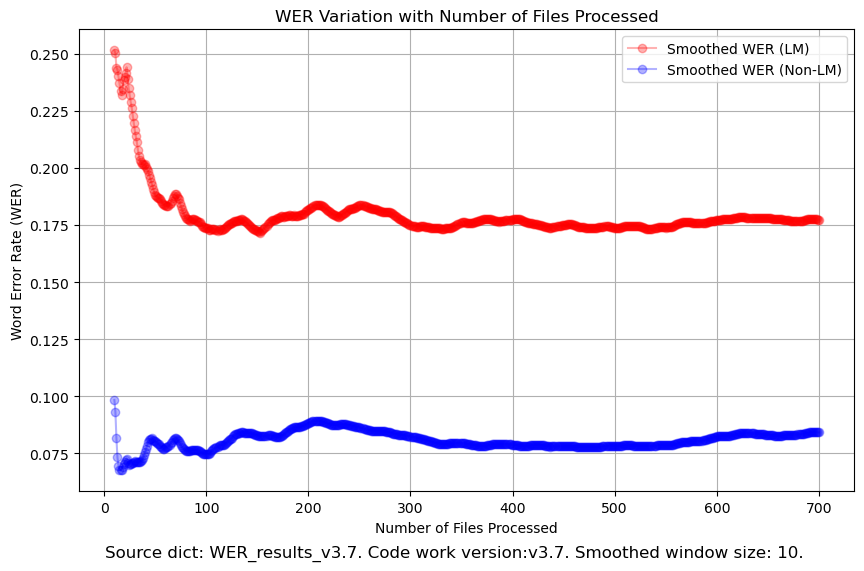

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store the number of files processed and the corresponding WER values for both models
num_files_processed = []
wer_values_non_lm = []
wer_values_lm = []

# Iterate over the number of files processed
for i in range(1, len(WER_results) + 1):
    # Initialize variables to accumulate totals for both models
    overall_total_asr_deletions_non_lm = 0
    overall_total_asr_additions_non_lm = 0
    overall_total_asr_substitutions_non_lm = 0
    overall_total_tokens_non_lm = 0
    
    overall_total_asr_deletions_lm = 0
    overall_total_asr_additions_lm = 0
    overall_total_asr_substitutions_lm = 0
    
    # Calculate overall totals for both models for the first i files
    for result in WER_results[:i]:
        if isinstance(result, dict):
            overall_total_asr_deletions_non_lm += result.get("wer_deletions", 0)
            overall_total_asr_additions_non_lm += result.get("wer_additions", 0)
            overall_total_asr_substitutions_non_lm += result.get("wer_substitutions", 0)
            overall_total_tokens_non_lm += result.get("wer_tokens", 0)
            
            overall_total_asr_deletions_lm += result.get("wer_deletions_lm", 0)
            overall_total_asr_additions_lm += result.get("wer_additions_lm", 0)
            overall_total_asr_substitutions_lm += result.get("wer_substitutions_lm", 0)
    
    # Calculate WER for both models
    if overall_total_tokens_non_lm > 0:
        wer_non_lm = (overall_total_asr_deletions_non_lm + overall_total_asr_additions_non_lm + overall_total_asr_substitutions_non_lm) / overall_total_tokens_non_lm
    else:
        wer_non_lm = 0
    
    if overall_total_tokens_non_lm > 0:
        wer_lm = (overall_total_asr_deletions_lm + overall_total_asr_additions_lm + overall_total_asr_substitutions_lm) / overall_total_tokens_non_lm
    else:
        wer_lm = 0
    
    # Append the number of files processed and the WER values to the lists
    num_files_processed.append(i)
    wer_values_non_lm.append(wer_non_lm)
    wer_values_lm.append(wer_lm)

# Define a function to calculate the moving average
def moving_average(values, window):
    weights = np.repeat(1.0, window) / window
    sma = np.convolve(values, weights, 'valid')
    return sma

# Calculate the moving average of the WER values for both models with a window size
window_size = 10  # Adjust this value as needed
smoothed_wer_values_non_lm = moving_average(wer_values_non_lm, window_size)
smoothed_wer_values_lm = moving_average(wer_values_lm, window_size)

# Adjust the num_files_processed to match the length of the smoothed WER values
adjusted_num_files_processed = num_files_processed[window_size-1:]

# Plot the WER values and the smoothed WER values for both models
plt.figure(figsize=(10, 6))
plt.plot(adjusted_num_files_processed, smoothed_wer_values_lm, marker='o', linestyle='-', color='r', alpha=0.3, label='Smoothed WER (LM)')
plt.plot(adjusted_num_files_processed, smoothed_wer_values_non_lm, marker='o', linestyle='-', color='b', alpha=0.3, label='Smoothed WER (Non-LM)')
plt.xlabel('Number of Files Processed')
plt.ylabel('Word Error Rate (WER)')
plt.title('WER Variation with Number of Files Processed')
plt.legend()
plt.grid(True)


# Add text at the bottom of the plot
wer_plot_from_version2 = wer_plot_from_version[:-4] + "png"

wer_plot_save = os.path.join(wer_plot_save_path, wer_plot_from_version2)

bottom_text = f"Source dict: {wer_plot_from_version[:-4]} Code work version:{work_version}. Smoothed window size: {window_size}."
plt.figtext(0.5, 0.001, bottom_text, wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig(wer_plot_save, dpi=300, bbox_inches='tight')
print(f"Saving plot: {wer_plot_save}")

plt.show()

### CER Plotting

Saving plot: D:\ASR\ParlaspeechHR\CER_results_v3.7.png


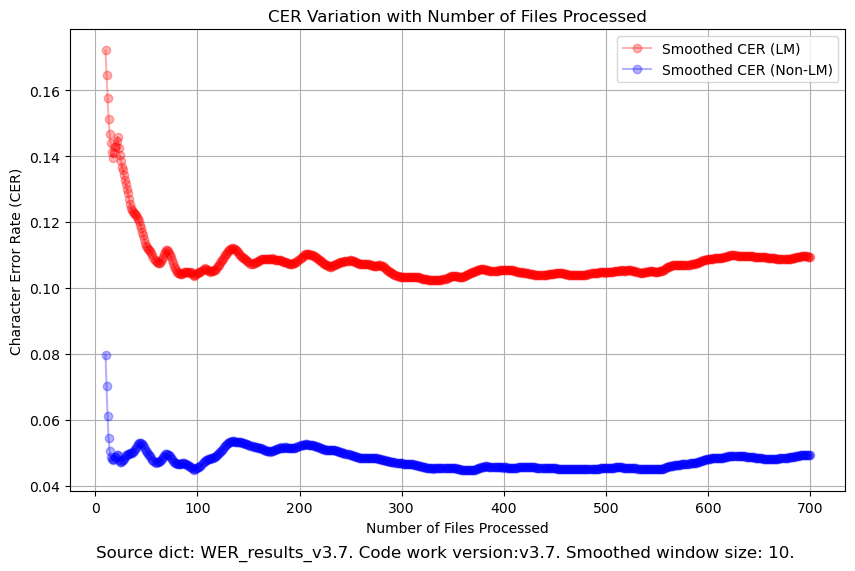

In [123]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Initialize lists to store the number of files processed and the corresponding CER values for both models
num_files_processed = []
cer_values_non_lm = []
cer_values_lm = []

# Iterate over the number of files processed
for i in range(1, len(WER_results) + 1):
    # Initialize variables to accumulate totals for both models
    overall_total_cer_deletions_non_lm = 0
    overall_total_cer_additions_non_lm = 0
    overall_total_cer_substitutions_non_lm = 0
    overall_total_cer_tokens_non_lm = 0
    
    overall_total_cer_deletions_lm = 0
    overall_total_cer_additions_lm = 0
    overall_total_cer_substitutions_lm = 0
    
    # Calculate overall totals for both models for the first i files
    for result in WER_results[:i]:
        if isinstance(result, dict):
            if result.get("cer_deletions") is not None:
                overall_total_cer_deletions_non_lm += result.get("cer_deletions", 0)
            if result.get("cer_additions") is not None:
                overall_total_cer_additions_non_lm += result.get("cer_additions", 0)
            if result.get("cer_substitutions") is not None:
                overall_total_cer_substitutions_non_lm += result.get("cer_substitutions", 0)
            overall_total_cer_tokens_non_lm += result.get("cer_tokens", 0)
            
            overall_total_cer_deletions_lm += result.get("cer_deletions_lm", 0)
            overall_total_cer_additions_lm += result.get("cer_additions_lm", 0)
            overall_total_cer_substitutions_lm += result.get("cer_substitutions_lm", 0)
    
    # Calculate CER for both models
    if overall_total_cer_tokens_non_lm > 0:
        cer_non_lm = (overall_total_cer_deletions_non_lm + overall_total_cer_additions_non_lm + overall_total_cer_substitutions_non_lm) / overall_total_cer_tokens_non_lm
    else:
        cer_non_lm = 0
    
    if overall_total_cer_tokens_non_lm > 0:
        cer_lm = (overall_total_cer_deletions_lm + overall_total_cer_additions_lm + overall_total_cer_substitutions_lm) / overall_total_cer_tokens_non_lm
    else:
        cer_lm = 0
    
    # Append the number of files processed and the CER values to the lists
    num_files_processed.append(i)
    cer_values_non_lm.append(cer_non_lm)
    cer_values_lm.append(cer_lm)

# Define a function to calculate the moving average
def moving_average(values, window):
    weights = np.repeat(1.0, window) / window
    sma = np.convolve(values, weights, 'valid')
    return sma

# Calculate the moving average of the CER values for both models with a window size
window_size = 10  # Adjust this value as needed
smoothed_cer_values_non_lm = moving_average(cer_values_non_lm, window_size)
smoothed_cer_values_lm = moving_average(cer_values_lm, window_size)

# Adjust the num_files_processed to match the length of the smoothed CER values
adjusted_num_files_processed = num_files_processed[window_size-1:]

# Plot the CER values and the smoothed CER values for both models
plt.figure(figsize=(10, 6))
plt.plot(adjusted_num_files_processed, smoothed_cer_values_lm, marker='o', linestyle='-', color='r', alpha=0.3, label='Smoothed CER (LM)')
plt.plot(adjusted_num_files_processed, smoothed_cer_values_non_lm, marker='o', linestyle='-', color='b', alpha=0.3, label='Smoothed CER (Non-LM)')
plt.xlabel('Number of Files Processed')
plt.ylabel('Character Error Rate (CER)')
plt.title('CER Variation with Number of Files Processed')
plt.legend()
plt.grid(True)

# Add text at the bottom of the plot
cer_plot_from_version2 = "CER" + cer_plot_from_version[3:-4] + "png"
cer_plot_save = os.path.join(cer_plot_save_path, cer_plot_from_version2)

bottom_text = f"Source dict: {cer_plot_from_version[:-4]} Code work version:{work_version}. Smoothed window size: {window_size}."
plt.figtext(0.5, 0.001, bottom_text, wrap=True, horizontalalignment='center', fontsize=12)

plt.savefig(cer_plot_save, dpi=300, bbox_inches='tight')
print(f"Saving plot: {cer_plot_save}")

plt.show()


## Sample size? Statistical Nightmare

In [154]:
import statsmodels.stats.api as sms

# Define parameters for sample size calculation
effect_size = 0.5  # Expected effect size (difference in means divided by standard deviation)
alpha = 0.001  # Significance level (typically 0.05 or 0.01 for 95% or 99% confidence)
power = 0.999  # Desired statistical power (typically 0.8 or 0.9)

# Calculate sample size for each group (assuming equal sample sizes for simplicity)
total_population = 403925  # Total population size
sample_size_needed = sms.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1.0, alternative='two-sided')

# Print the calculated sample size
print(f"Required sample size per group: {sample_size_needed:.0f}")

# Calculate how many groups you can sample from total population
# For simplicity, assuming that you have a large enough population to draw multiple samples
num_groups = total_population / sample_size_needed

# Print the number of groups
print(f"Number of groups you can sample: {num_groups:.0f}")


Required sample size per group: 328
Number of groups you can sample: 1230


In [142]:
import scipy.stats as stats

# Define parameters
sample_size = 600
sigma = 10  # Estimated standard deviation
confidence_level = 0.99  # 95% confidence level

# Find the z-score for the desired confidence level
z = stats.norm.ppf((1 + confidence_level) / 2)  # For a two-tailed test

# Calculate the margin of error (MOE)
MOE = z * (sigma / (sample_size ** 0.5))

# Calculate the confidence interval (CI)
mean_estimate = 0  # Replace with your mean estimate if known
CI_low = mean_estimate - MOE
CI_high = mean_estimate + MOE

# Print results
print(f"Sample Size: {sample_size}")
print(f"Estimated Standard Deviation (sigma): {sigma}")
print(f"Confidence Interval (CI) for {confidence_level * 100}% confidence level: [{CI_low:.4f}, {CI_high:.4f}]")


Sample Size: 600
Estimated Standard Deviation (sigma): 10
Confidence Interval (CI) for 99.0% confidence level: [-1.0516, 1.0516]


WER - Mean: 36.61, Std: 13.32
CER - Mean: 186.10, Std: 64.96


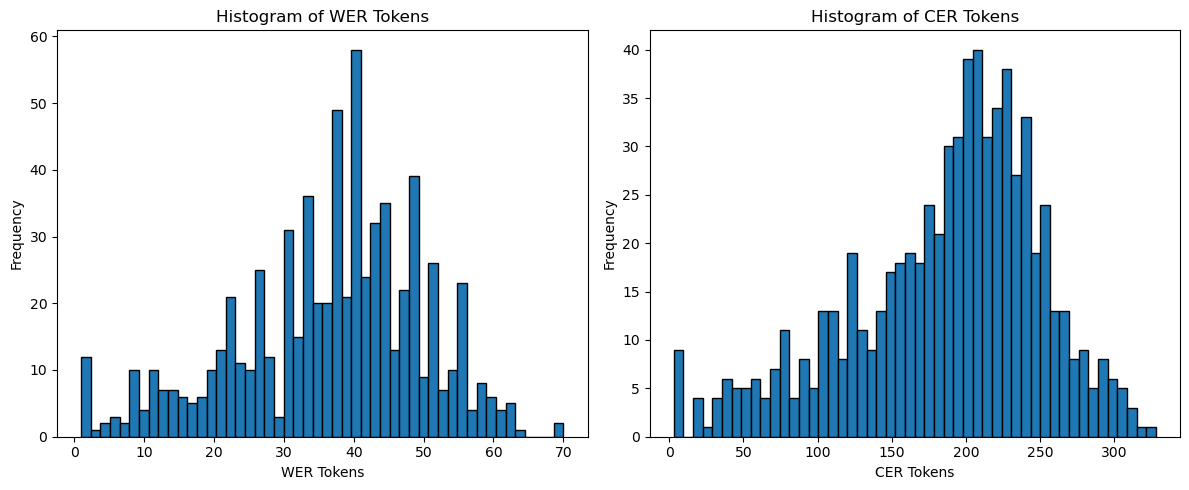

In [176]:
import numpy as np
import matplotlib.pyplot as plt

# Extract WER and CER metrics into lists
wer_tokens = [result["wer_tokens"] for result in WER_results]
cer_tokens = [result["cer_tokens"] for result in WER_results]

# Calculate descriptive statistics
wer_mean = np.mean(wer_tokens)
wer_std = np.std(wer_tokens)
cer_mean = np.mean(cer_tokens)
cer_std = np.std(cer_tokens)

# Print summary statistics
print(f"WER - Mean: {wer_mean:.2f}, Std: {wer_std:.2f}")
print(f"CER - Mean: {cer_mean:.2f}, Std: {cer_std:.2f}")

# Create histograms to visualize distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(wer_tokens, bins=50, edgecolor='black')
plt.title('Histogram of WER Tokens')
plt.xlabel('WER Tokens')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(cer_tokens, bins=50, edgecolor='black')
plt.title('Histogram of CER Tokens')
plt.xlabel('CER Tokens')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [161]:
import numpy as np
from scipy.stats import ttest_ind, f_oneway
import statsmodels.stats.api as sms# Assuming results_list is your list of dictionaries with the relevant data

wer_non_lm = []
wer_lm = []
cer_non_lm = []
cer_lm = []

for result in WER_results:
    wer_rate = (result["wer_deletions"] + result["wer_additions"] + result["wer_substitutions"]) / result["wer_tokens"] if result["wer_tokens"] > 0 else 0
    wer_rate_lm = (result["wer_deletions_lm"] + result["wer_additions_lm"] + result["wer_substitutions_lm"]) / result["wer_tokens"] if result["wer_tokens"] > 0 else 0

    cer_rate = (result["cer_deletions"] + result["cer_additions"] + result["cer_substitutions"]) / result["cer_tokens"] if result["cer_tokens"] > 0 else 0
    cer_rate_lm = (result["cer_deletions_lm"] + result["cer_additions_lm"] + result["cer_substitutions_lm"]) / result["cer_tokens"] if result["cer_tokens"] > 0 else 0

    wer_non_lm.append(wer_rate)
    wer_lm.append(wer_rate_lm)
    cer_non_lm.append(cer_rate)
    cer_lm.append(cer_rate_lm)

# Print the calculated WER and CER rates for non-LM and LM
# print(f"WER rates (Non-LM): {wer_non_lm}")
# print(f"WER rates (LM): {wer_lm}")
# print(f"CER rates (Non-LM): {cer_non_lm}")
# print(f"CER rates (LM): {cer_lm}")

In [169]:
# Calculate confidence intervals
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    h = sem * stats.t.ppf((1 + confidence) / 2, n - 1)
    return mean, mean - h, mean + h

wer_non_lm_ci = confidence_interval(wer_non_lm)
wer_lm_ci = confidence_interval(wer_lm)
cer_non_lm_ci = confidence_interval(cer_non_lm)
cer_lm_ci = confidence_interval(cer_lm)

print(f"WER Non-LM: Mean={wer_non_lm_ci[0]:.4f}, CI=({wer_non_lm_ci[1]:.4f}, {wer_non_lm_ci[2]:.4f})")
print(f"WER LM: Mean={wer_lm_ci[0]:.4f}, CI=({wer_lm_ci[1]:.4f}, {wer_lm_ci[2]:.4f})")
print(f"CER Non-LM: Mean={cer_non_lm_ci[0]:.4f}, CI=({cer_non_lm_ci[1]:.4f}, {cer_non_lm_ci[2]:.4f})")
print(f"CER LM: Mean={cer_lm_ci[0]:.4f}, CI=({cer_lm_ci[1]:.4f}, {cer_lm_ci[2]:.4f})")

WER Non-LM: Mean=0.0834, CI=(0.0749, 0.0919)
WER LM: Mean=0.1655, CI=(0.1521, 0.1790)
CER Non-LM: Mean=0.0495, CI=(0.0439, 0.0550)
CER LM: Mean=0.1056, CI=(0.0964, 0.1148)


In [171]:
import scipy.stats as stats

# Calculate Pearson's correlation coefficient for WER and CER rates
correlation_wer_non_lm, p_value_wer_non_lm = stats.pearsonr(wer_non_lm, cer_non_lm)
correlation_wer_lm, p_value_wer_lm = stats.pearsonr(wer_lm, cer_lm)

print(f"Pearson's correlation coefficient between WER and CER rates for Non-LM: {correlation_wer_non_lm:.2f}")
print(f"P-value: {p_value_wer_non_lm:.4f}\n")

print(f"Pearson's correlation coefficient between WER and CER rates for LM: {correlation_wer_lm:.2f}")
print(f"P-value: {p_value_wer_lm:.4f}")


Pearson's correlation coefficient between WER and CER rates for Non-LM: 0.92
P-value: 0.0000

Pearson's correlation coefficient between WER and CER rates for LM: 0.95
P-value: 0.0000


In [162]:
# Perform t-tests for WER
wer_t_stat, wer_p_value = ttest_ind(wer_non_lm, wer_lm)
print(f"WER T-test: t-statistic = {wer_t_stat:.3f}, p-value = {wer_p_value:.3f}")

# Perform t-tests for CER
cer_t_stat, cer_p_value = ttest_ind(cer_non_lm, cer_lm)
print(f"CER T-test: t-statistic = {cer_t_stat:.3f}, p-value = {cer_p_value:.3f}")


WER T-test: t-statistic = -10.139, p-value = 0.000
CER T-test: t-statistic = -10.264, p-value = 0.000


In [163]:
# Assuming you have more groups, for example:
wer_group1 = wer_non_lm
wer_group2 = wer_lm
# Add other groups if needed

# Perform ANOVA for WER
wer_f_stat, wer_p_value = f_oneway(wer_group1, wer_group2)
print(f"WER ANOVA: F-statistic = {wer_f_stat:.3f}, p-value = {wer_p_value:.3f}")

# Assuming you have more groups, for example:
cer_group1 = cer_non_lm
cer_group2 = cer_lm
# Add other groups if needed

# Perform ANOVA for CER
cer_f_stat, cer_p_value = f_oneway(cer_group1, cer_group2)
print(f"CER ANOVA: F-statistic = {cer_f_stat:.3f}, p-value = {cer_p_value:.3f}")


WER ANOVA: F-statistic = 102.792, p-value = 0.000
CER ANOVA: F-statistic = 105.346, p-value = 0.000


In [164]:
# Define the sample size you can afford
sample_size = 600  # Your actual sample size

# Calculate the confidence interval for WER
wer_conf_interval = sms.DescrStatsW(wer_non_lm[:sample_size]).tconfint_mean()
print(f"WER Confidence Interval: {wer_conf_interval}")

# Calculate the confidence interval for CER
cer_conf_interval = sms.DescrStatsW(cer_non_lm[:sample_size]).tconfint_mean()
print(f"CER Confidence Interval: {cer_conf_interval}")


WER Confidence Interval: (0.07344274844841658, 0.09210594100831151)
CER Confidence Interval: (0.04328806886773624, 0.05547488908062649)


In [168]:
import statsmodels.stats.api as sms

# Define the parameters for the sample size calculation
effect_size = 0.1  # This is a commonly used medium effect size
alpha = 0.05  # Significance level
power = 0.8  # Desired statistical power

# Calculate the sample size needed for the given effect size, alpha, and power
sample_size_needed = sms.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=1.0, alternative='two-sided')

print(f"Required sample size per group for effect size {effect_size}: {sample_size_needed:.0f}")

# Check if the sample size of 600 is adequate for the given power and effect size
power_given_sample_size = sms.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, nobs1=600, ratio=1.0, alternative='two-sided')

print(f"Power with sample size of 600: {power_given_sample_size:.4f}")


Required sample size per group for effect size 0.1: 1571
Power with sample size of 600: 0.4094


# x scrap later

# Log info